In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
from scipy.stats import linregress
from scipy.interpolate import interp1d
import matplotlib.dates as mdates

In [3]:
#Données Novembre-Décembre 
#données bodenquellen 
data_271 = pd.read_excel("SP_CHYN271_2024-12-16_11_03_29.xlsx")
data_272 = pd.read_excel("SP_CHYN272_2024-12-16_11_17_35.xlsx")
data_273 = pd.read_excel("SP_CHYN273_2024-12-16_11_32_19.xlsx")
data_274 = pd.read_excel("SP_CHYN274_2024-12-16_11_45_47.xlsx")

#données fluelabach
data_276 = pd.read_excel("SP_CHYN276_2024-12-16_12_31_22.xlsx")

#données felsenquelle hf
data_277 = pd.read_excel("SP_CHYN277_2024-12-16_10_25_21.xlsx")

#données BQ1 pression atmmopshérique et température 
data_261 = pd.read_excel("SP_CHYN261_2024-12-16_10_52_29.xlsx")

In [4]:
data_261.head(15)

,File created from KolibriDesktop at,dates,2024-12-16 10:52:41.119000,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,Time Range Start:,2024-11-04 09:15:00,2024-11-04 09:15:00,NaN,NaN
2,Time Range End:,2024-12-16 10:45:00,2024-12-16 10:45:00,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Device name:,NaN,NaN,SP_CHYN261,NaN
5,Serial number:,NaN,NaN,1530372,NaN
6,Device type:,NaN,NaN,DCX (5.5),NaN
7,Record name:,NaN,NaN,REC 5.5 2024.11.04 09-15-00,NaN
8,No,Datetime _x000D_\n[local time]_x000D_\nEtc/UTC,Datetime _x000D_\n[UTC],P1 _x000D_\n[mbar],TOB1 _x000D_\n[°C]
9,1,2024-11-04 09:15:00,2024-11-04 09:15:00,823.547363,14.959961


In [5]:
cond_271 = data_271["Unnamed: 6"][11:].values
mbar_271 = data_271["Unnamed: 3"][11:].values
T_271 = data_271["Unnamed: 4"][11:].values
cond_271_12 = data_271["Unnamed: 6"][9:].values
mbar_271_12 = data_271["Unnamed: 3"][9:].values
T_271_12 = data_271["Unnamed: 4"][9:].values
temps_271 = data_271["File created from KolibriDesktop at "][11:].values
temps_271_12 = data_271["dates"][9:].values

cond_272 = data_272["Unnamed: 6"][14:].values
mbar_272 = data_272["Unnamed: 3"][14:].values
T_272 = data_272["Unnamed: 4"][14:].values
cond_272_12 = data_272["Unnamed: 6"][9:].values
mbar_272_12 = data_272["Unnamed: 3"][9:].values
T_272_12 = data_272["Unnamed: 4"][9:].values
temps_272 = data_272["File created from KolibriDesktop at "][14:].values
temps_272_12 = data_272["dates"][9:].values

cond_273 = data_273["Unnamed: 6"][14:].values
mbar_273 = data_273["Unnamed: 3"][14:].values
T_273 = data_273["Unnamed: 4"][14:].values
cond_273_12 = data_273["Unnamed: 6"][9:].values
mbar_273_12 = data_273["Unnamed: 3"][9:].values
T_273_12 = data_273["Unnamed: 4"][9:].values
temps_273 = data_273["File created from KolibriDesktop at "][14:].values
temps_273_12 = data_273["2024-12-16 11:32:32.046000.1"][9:].values

cond_274 = data_274["Unnamed: 6"][14:].values
mbar_274 = data_274["Unnamed: 3"][14:].values
T_274 = data_274["Unnamed: 4"][14:].values
cond_274_12 = data_274["Unnamed: 6"][9:].values
mbar_274_12 = data_274["Unnamed: 3"][9:].values
T_274_12 = data_274["Unnamed: 4"][9:].values
temps_274 = data_274["File created from KolibriDesktop at "][14:].values
temps_274_12 = data_274["2024-12-16 11:45:58.900000.1"][9:].values

cond_276 = data_276["Unnamed: 6"][19:].values
mbar_276 = data_276["Unnamed: 3"][19:].values
T_276 = data_276["Unnamed: 4"][19:].values
cond_276_12 = data_276["Unnamed: 6"][9:].values
mbar_276_12 = data_276["Unnamed: 3"][9:].values
T_276_12 = data_276["Unnamed: 4"][9:].values
temps_276 = data_276["File created from KolibriDesktop at "][19:].values
temps_276_12 = data_276["dates"][9:].values

cond_277 = data_277["Unnamed: 6"][21:].values
mbar_277 = data_277["Unnamed: 3"][21:].values
T_277 = data_277["Unnamed: 4"][21:].values
cond_277_12 = data_277["Unnamed: 6"][9:].values
mbar_277_12 = data_277["Unnamed: 3"][9:].values
T_277_12 = data_277["Unnamed: 4"][9:].values
temps_277 = data_277["File created from KolibriDesktop at "][21:].values
temps_277_12 = data_277["2024-12-16 10:25:30.086000.1"][9:].values

mbar_261 = data_261["Unnamed: 3"][9:].values
T_261 = data_261["Unnamed: 4"][9:].values
mbar_261_12 = data_261["Unnamed: 3"][9:].values
T_261_12 = data_261["Unnamed: 4"][9:].values
temps_261 = data_261["File created from KolibriDesktop at "][9:].values
temps_261_12 = data_261["dates"][9:].values

In [6]:
print(temps_271[0]) #13:00:00 au numéro 17 > 17 - 3 [14]
print(temps_272[0]) #13:00:00 au numéro 17 > 17 - 6 [11]
print(temps_273[0]) #13:00:00 au numéro 17 > 17 - 6 [11]
print(temps_274[0]) #13:00:00 au numéro 17 > 17 - 6 [11]
print(temps_276[0]) #13:00:00 au numéro 13 > 13 - 11 [2]
print(temps_277[0]) #13:00:00 au numéro 13 > 13 -13 [0]


3
6
6
6
11
13


In [7]:
jours_271 = [(temps_271[i] - 3) / 4 / 24    for i in range(len(temps_271))]
heures_271 = [(temps_271[i] - 3) / 4    for i in range(len(temps_271))]

jours_272 = [(temps_272[i] - 3) / 4 / 24    for i in range(len(temps_272))]
heures_272 = [(temps_272[i] - 3) / 4     for i in range(len(temps_272))]

jours_273 = [(temps_273[i] - 3) / 4 / 24    for i in range(len(temps_273))]
heures_273 = [(temps_273[i] - 3) / 4     for i in range(len(temps_273))]

jours_274 = [(temps_274[i] - 3) / 4 / 24    for i in range(len(temps_274))]
heures_274 = [(temps_274[i] - 3) / 4     for i in range(len(temps_274))]

jours_276 = [(temps_276[i] - 3) / 2 / 24    for i in range(len(temps_276))]
heures_276 = [(temps_276[i] - 3) / 2     for i in range(len(temps_276))]

jours_277 = [(temps_277[i] - 3) / 2 / 24    for i in range(len(temps_277))]
heures_277 = [(temps_277[i] - 3) / 2     for i in range(len(temps_277))]

jours_261 = [(temps_261[i] - 3) / 4 / 24    for i in range(len(temps_261))]
heures_261 = [(temps_261[i] - 3) / 4     for i in range(len(temps_261))]

In [8]:
#interpolation des données 

interp_271 = interp1d(jours_271, cond_271, kind='linear')

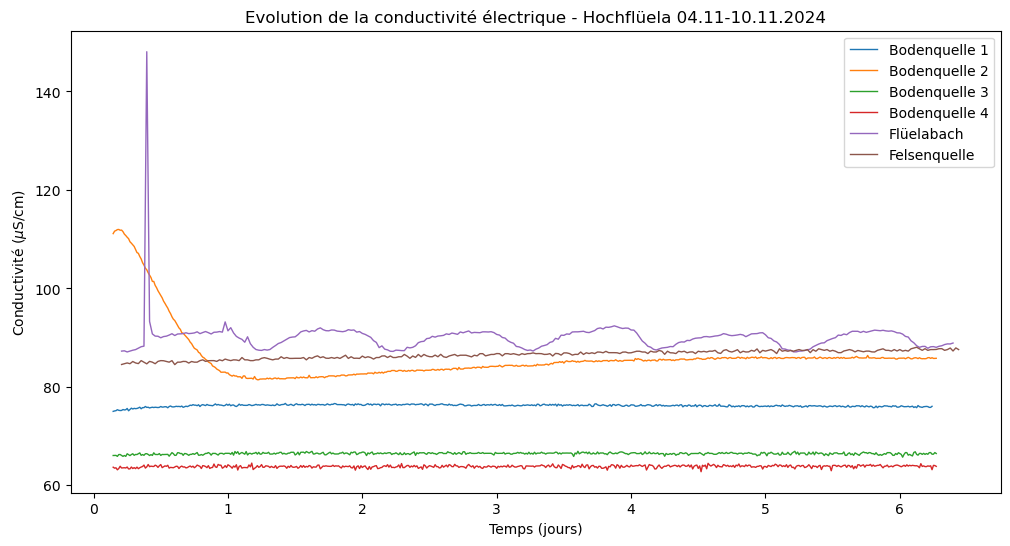

In [9]:
plt.figure(figsize=(12,6))
plt.plot(jours_271[14:600], cond_271[14:600], lw=1, label='Bodenquelle 1')
plt.plot(jours_272[11:600], cond_272[11:600], lw=1, label='Bodenquelle 2')
plt.plot(jours_273[11:600], cond_273[11:600], lw=1, label='Bodenquelle 3')
plt.plot(jours_274[11:600], cond_274[11:600], lw=1, label='Bodenquelle 4')
plt.plot(jours_276[2:300], cond_276[2:300], lw=1, label='Flüelabach')
plt.plot(jours_277[:300], cond_277[:300], lw=1, label='Felsenquelle')
plt.xlabel('Temps (jours)')
plt.ylabel('Conductivité ($\\mu$S/cm)')
plt.legend()
plt.title('Evolution de la conductivité électrique - Hochflüela 04.11-10.11.2024')
plt.show()

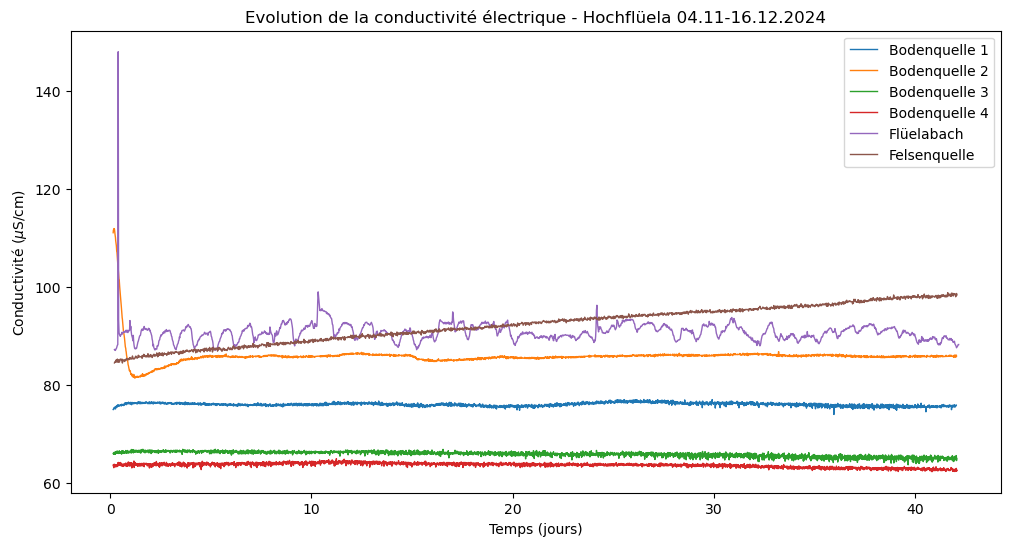

In [10]:
plt.figure(figsize=(12,6))
plt.plot(jours_271[14:], cond_271[14:], lw=1, label='Bodenquelle 1')
plt.plot(jours_272[11:], cond_272[11:], lw=1, label='Bodenquelle 2')
plt.plot(jours_273[11:], cond_273[11:], lw=1, label='Bodenquelle 3')
plt.plot(jours_274[11:], cond_274[11:], lw=1, label='Bodenquelle 4')
plt.plot(jours_276[2:], cond_276[2:], lw=1, label='Flüelabach')
plt.plot(jours_277, cond_277, lw=1, label='Felsenquelle')
plt.xlabel('Temps (jours)')
plt.ylabel('Conductivité ($\\mu$S/cm)')
plt.legend()
plt.title('Evolution de la conductivité électrique - Hochflüela 04.11-16.12.2024')
plt.show()

In [11]:
print(f"\033[1mConductivités le 16.12.24 :\033[0m ")
print('--'*20)
print(f" - BQ1 : {cond_271[-2]:.3f} (sonde) vs 62.2 (CHYN7)")
print(f" - BQ2 : {cond_272[-2]:.3f} (sonde) vs 64.8 (CHYN7)")
print(f" - BQ3 : {cond_273[-2]:.3f} (sonde) vs 69.0 (CHYN7)")
print(f" - BQ4 : {cond_274[-2]:.3f} (sonde) vs 66.4 (CHYN7)")
print(f" - FB  : {cond_276[-2]:.3f} (sonde) vs 69.0 (CHYN7)")
print(f" - FQ  : {cond_277[-2]:.3f} (sonde) vs 68.5 (CHYN7)")

Conductivités le 16.12.24 : 
----------------------------------------
 - BQ1 : 75.933 (sonde) vs 62.2 (CHYN7)
 - BQ2 : 86.151 (sonde) vs 64.8 (CHYN7)
 - BQ3 : 64.610 (sonde) vs 69.0 (CHYN7)
 - BQ4 : 62.607 (sonde) vs 66.4 (CHYN7)
 - FB  : 88.303 (sonde) vs 69.0 (CHYN7)
 - FQ  : 98.722 (sonde) vs 68.5 (CHYN7)


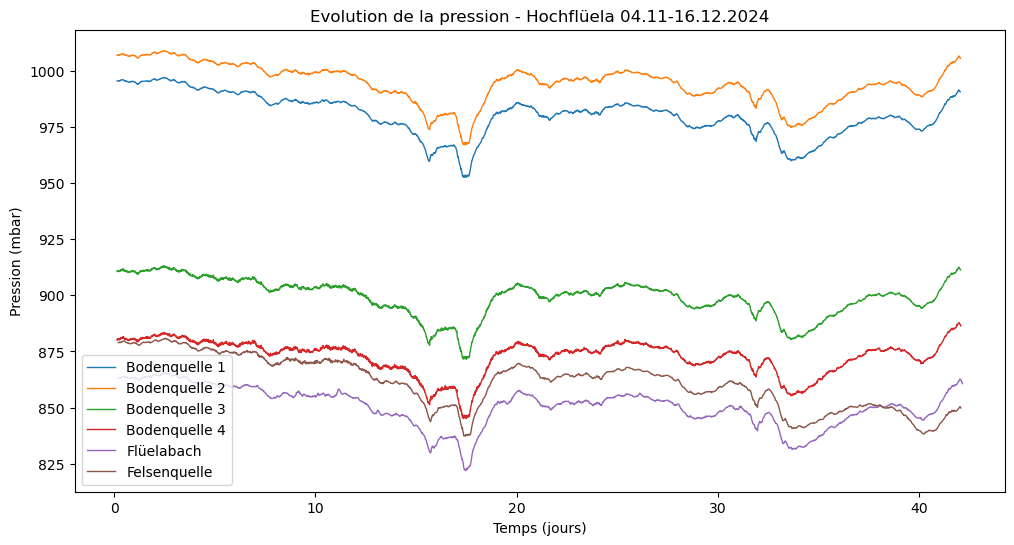

In [12]:
plt.figure(figsize=(12,6))
plt.plot(jours_271[14:], mbar_271[14:], lw=1, label='Bodenquelle 1')
plt.plot(jours_272[11:], mbar_272[11:], lw=1, label='Bodenquelle 2')
plt.plot(jours_273[11:], mbar_273[11:], lw=1, label='Bodenquelle 3')
plt.plot(jours_274[11:], mbar_274[11:], lw=1, label='Bodenquelle 4')
plt.plot(jours_276[2:], mbar_276[2:], lw=1, label='Flüelabach')
plt.plot(jours_277, mbar_277, lw=1, label='Felsenquelle')
plt.xlabel('Temps (jours)')
plt.ylabel('Pression (mbar)')
plt.legend()
plt.title('Evolution de la pression - Hochflüela 04.11-16.12.2024')
plt.show()

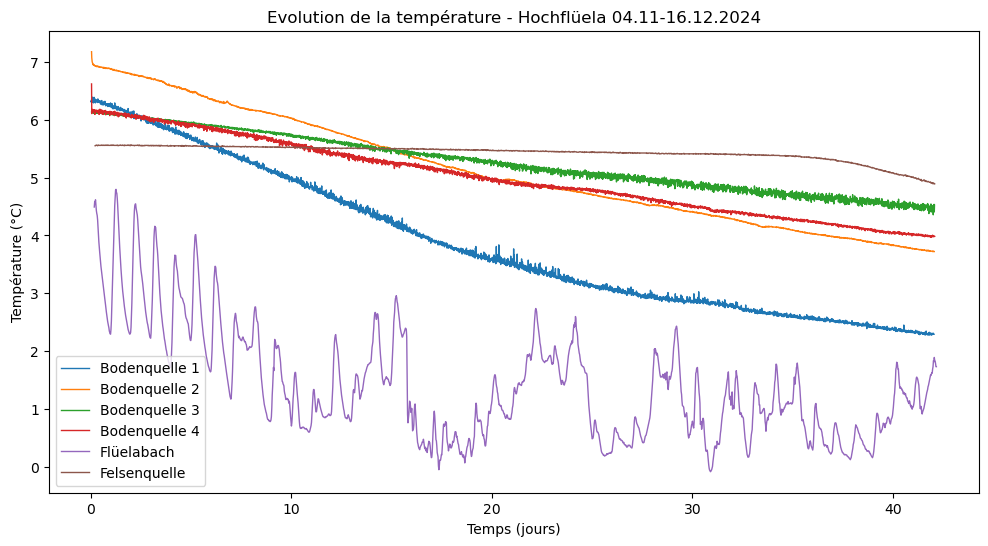

In [13]:
plt.figure(figsize=(12,6))
plt.plot(jours_271, T_271, lw=1, label='Bodenquelle 1')
plt.plot(jours_272, T_272, lw=1, label='Bodenquelle 2')
plt.plot(jours_273, T_273, lw=1, label='Bodenquelle 3')
plt.plot(jours_274, T_274, lw=1, label='Bodenquelle 4')
plt.plot(jours_276, T_276, lw=1, label='Flüelabach')
plt.plot(jours_277, T_277, lw=1, label='Felsenquelle')
plt.xlabel('Temps (jours)')
plt.ylabel('Température (°C)')
plt.legend()
plt.title('Evolution de la température - Hochflüela 04.11-16.12.2024')
plt.show()

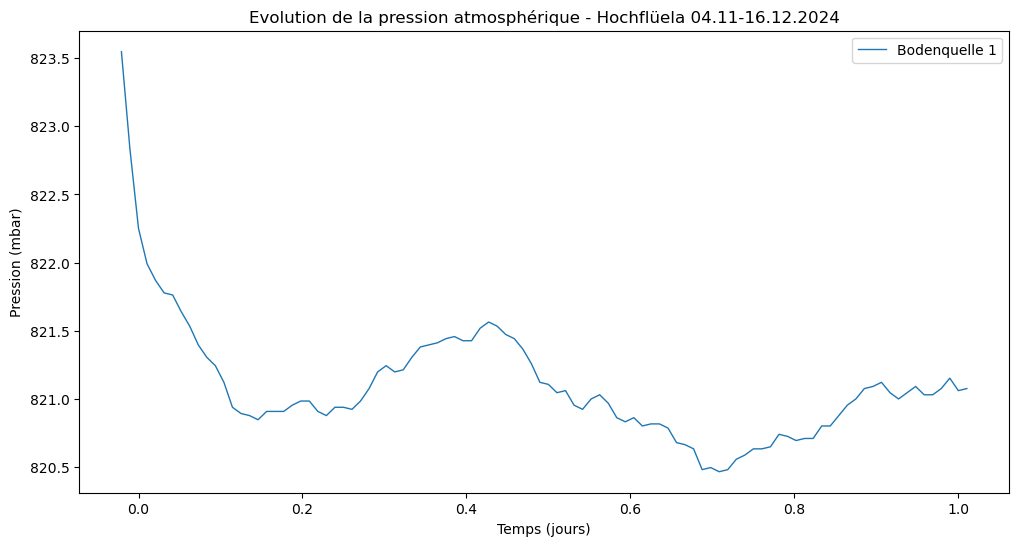

In [14]:
plt.figure(figsize=(12,6))
plt.plot(jours_261[:100], mbar_261[:100], lw=1, label='Bodenquelle 1')
plt.xlabel('Temps (jours)')
plt.ylabel('Pression (mbar)')
plt.legend()
plt.title('Evolution de la pression atmosphérique - Hochflüela 04.11-16.12.2024')
plt.show()

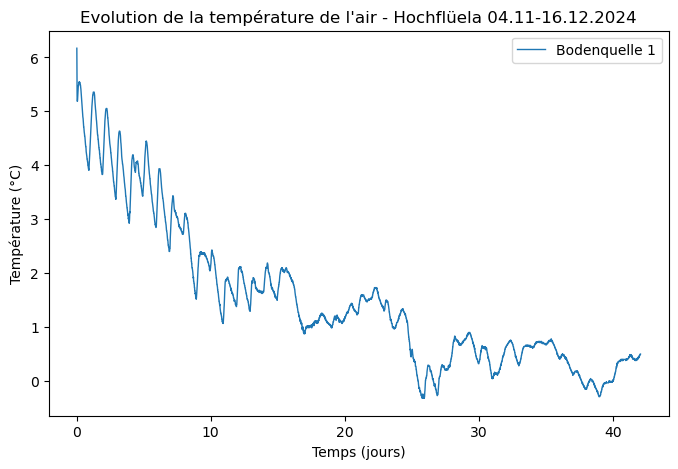

In [15]:
plt.figure(figsize=(8,5))
plt.plot(jours_261[3:], T_261[3:], lw=1, label='Bodenquelle 1')
plt.xlabel('Temps (jours)')
plt.ylabel('Température (°C)')
plt.legend()
plt.title('Evolution de la température de l\'air - Hochflüela 04.11-16.12.2024')
plt.show()

In [150]:
# données récoltées avec le CHYN7 et hauteur

dates_mesures = np.array(['2024-09-11', '2024-11-04', '2024-12-16', '2025-01-13', '2025-02-14', '2025-03-14', '2025-04-23'], dtype='datetime64[D]')

#Bodenquelle 1 
cond_bq1 = [62, 69, 62.2, 63.7, 62.9, 65.4, 63.5]
T_bq1 = [np.nan, 7.1, 2.7, 0.6, 0.7, 1.7, 3.9]
O2_bq1 = [np.nan, 9.05, 10.59, 10.77, 10.25, 9.41, 8.27]
h_bq1 = [np.nan, 163.5-163.5, 163.5-177, 163.5-169, 163.5-183, 163.5-184, 163.5-162]

#Bodenquelle 2
cond_bq2 = [np.nan, 68, 64.8, 64.1, 63.4, 64.4, 62.8]
T_bq2 = [np.nan, 6.9, 2.5, 1.2, 0.9, 2.2, 3.6]
O2_bq2 = [np.nan, 8.58, 10.53, 10.2, 10.34, 9.19, 8.38]
h_bq2 = [np.nan, 148-148, 148-158, 148-153, 148-163, 148-164, 148-147]

#Bodenquelle 3
cond_bq3 = [np.nan, 68.1, 69.0, 67.0, 65.3, 65.3, 64.7]
T_bq3 = [np.nan, 6.7, 2.2, 2.4, 2.1, 2.8, 4.1]
O2_bq3 = [np.nan, 8.99, 10.37, 9.67, 9.87, 9.41, 8.91]
h_bq3 = [np.nan, 149-149, 149-155, 149-155, 149-159, 149-157, 149-148]

#Bodenquelle 4
cond_bq4 = [np.nan, 66.1, 66.4, 65.8, 63.8, 64.3, 59.7]
T_bq4 = [np.nan, 7.0, 3.4, 2.1, 2.5, 2.8, 4.5]
O2_bq4 = [np.nan, 9.80, 10.85, 10.50, 10.41, 9.89, 9.42]
h_bq4 = [np.nan, 202-202, 202-203, 202-200, 202-205, 202-204, 202-200]

#Bodenquelle 5
cond_bq5 = [np.nan, 68.9, 69.9, 67.1, 66.5, 66.4, 66.8]
T_bq5 = [np.nan, 7.3, 3.2, 3.5, 3.2, 3.6, 4.5]
O2_bq5 = [np.nan, 9.03, 10.07, 9.70, 9.68, 9.29, 9.17]
h_bq5 = [np.nan, 165-165, 165-168, 165-165, 165-168, 165-167, 165-166]

#Flüelabach 
cond_fb = [np.nan, 72.6, 69.0, 52.6, 67.4, 69.0, 59.2]
T_fb = [np.nan, 5.1, 1.0, 0.0, 0.1, 3.2, 6.2]
O2_fb = [np.nan, 11.25, 12.16, 12.43, 11.54, 10.24, 9.46]
h_fb = [np.nan, 124-124, 124-132, 124-130, 124-136, 124-136, 124-125]
h_fb2 = [np.nan, 51-51, 51-61, np.nan, 51-67, 51-65, 51-52]

#7 Felsenquelle 402
cond_fq = [65, 62.5, 68.5, 75.1, 74.9, 84.3, 88.5]
T_fq = [6.8, 5.6, 7.0, 2.1, 3.1, 4.3, 5.7]
O2_fq = [np.nan, 10.36, 9.80, 9.64, 9.63, 8.85, 8.92]
h_fq = [np.nan, 44-44, 44-82, 44-103, 44-108, 44-108, 44-101]



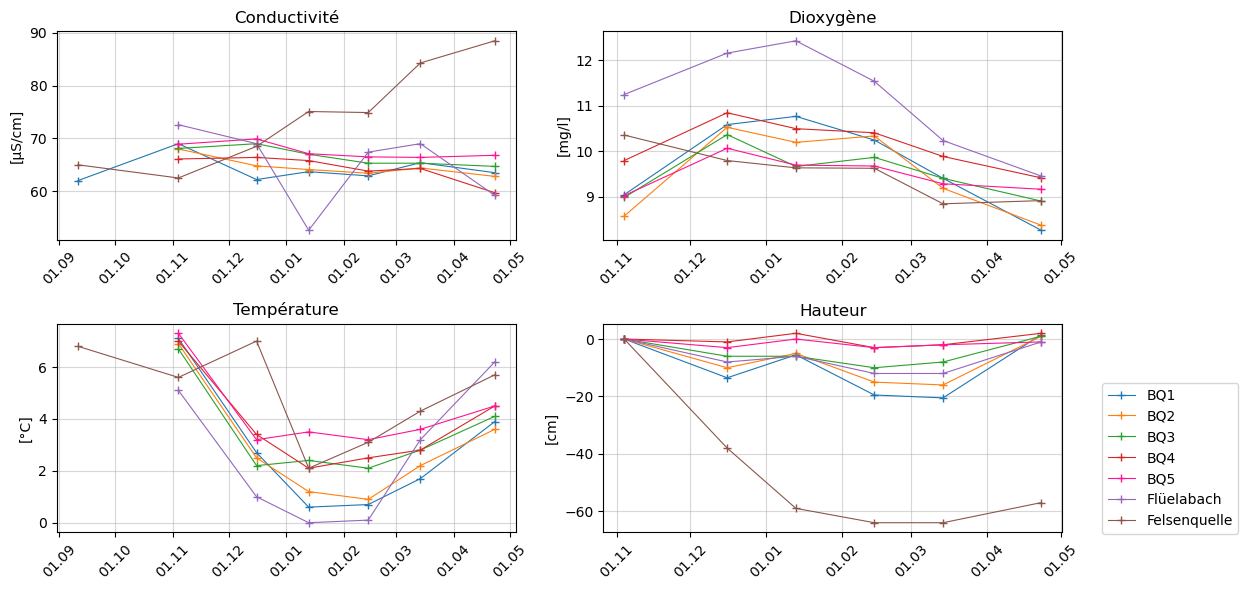

In [155]:
#Graphes

fig, axes = plt.subplots(2, 2, figsize=(11, 6))

#Conductivité
axes[0, 0].plot(dates_mesures, cond_bq1, marker='+', label='BQ1', lw=0.8) 
axes[0, 0].plot(dates_mesures, cond_bq2, marker='+', label='BQ2', lw=0.8) 
axes[0, 0].plot(dates_mesures, cond_bq3, marker='+', label='BQ3', lw=0.8) 
axes[0, 0].plot(dates_mesures, cond_bq4, marker='+', label='BQ4', lw=0.8) 
axes[0, 0].plot(dates_mesures, cond_bq5, marker='+', label='BQ5', lw=0.8, color='deeppink') 
axes[0, 0].plot(dates_mesures, cond_fb, marker='+', label='Flüelabach', lw=0.8) 
axes[0, 0].plot(dates_mesures, cond_fq, marker='+', label='Felsenquelle', lw=0.8) 
axes[0, 0].grid(alpha=0.5) 
#axes[0, 0].legend()
axes[0, 0].set_title("Conductivité")
axes[0, 0].set_ylabel("[μS/cm]")

#Température
#axes[0, 1].plot(dates_mesures, T_bq1, marker='+', lw=0.8) 
axes[1, 0].plot(dates_mesures, T_bq1, marker='+', lw=0.8) 
axes[1, 0].plot(dates_mesures, T_bq2, marker='+', lw=0.8) 
axes[1, 0].plot(dates_mesures, T_bq3, marker='+', lw=0.8) 
axes[1, 0].plot(dates_mesures, T_bq4, marker='+', lw=0.8) 
axes[1, 0].plot(dates_mesures, T_bq5, marker='+', lw=0.8, color='deeppink') 
axes[1, 0].plot(dates_mesures, T_fb, marker='+', lw=0.8) 
axes[1, 0].plot(dates_mesures, T_fq, marker='+', lw=0.8) 
axes[1, 0].grid(alpha=0.5)  
axes[1, 0].set_title("Température")
axes[1, 0].set_ylabel("[°C]")

#Dioxygène
axes[0, 1].plot(dates_mesures, O2_bq1, marker='+', lw=0.8) 
axes[0, 1].plot(dates_mesures, O2_bq2, marker='+', lw=0.8) 
axes[0, 1].plot(dates_mesures, O2_bq3, marker='+', lw=0.8) 
axes[0, 1].plot(dates_mesures, O2_bq4, marker='+', lw=0.8) 
axes[0, 1].plot(dates_mesures, O2_bq5, marker='+', lw=0.8, color='deeppink') 
axes[0, 1].plot(dates_mesures, O2_fb, marker='+', lw=0.8) 
axes[0, 1].plot(dates_mesures, O2_fq, marker='+', lw=0.8) 
axes[0, 1].grid(alpha=0.5) 
axes[0, 1].set_title("Dioxygène")
axes[0, 1].set_ylabel("[mg/l]")


#Hauteur d'eau 
axes[1, 1].plot(dates_mesures, h_bq1, marker='+', lw=0.8) 
axes[1, 1].plot(dates_mesures, h_bq2, marker='+', lw=0.8) 
axes[1, 1].plot(dates_mesures, h_bq3, marker='+', lw=0.8) 
axes[1, 1].plot(dates_mesures, h_bq4, marker='+', lw=0.8) 
axes[1, 1].plot(dates_mesures, h_bq5, marker='+', lw=0.8, color='deeppink') 
axes[1, 1].plot(dates_mesures, h_fb, marker='+', lw=0.8) 
axes[1, 1].plot(dates_mesures, h_fq, marker='+', lw=0.8) 
axes[1, 1].grid(alpha=0.5) 
axes[1, 1].set_title("Hauteur")
axes[1, 1].set_ylabel("[cm]")


# Formatage de l'axe des dates
for ax in axes.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
    ax.tick_params(axis='x', rotation=45)

# Récupération des handles et labels depuis le premier axe
handles, labels = axes[0, 0].get_legend_handles_labels()

# Création de la légende globale
fig.legend(
    handles, labels,
    loc='center left',
    bbox_to_anchor=(1, 0.228),
    frameon=True
)

plt.tight_layout()
plt.savefig('evolution_CHYN7_11-04.png', dpi=300, bbox_inches='tight')
#plt.subplots_adjust(right=0.8)  # Laisse de l'espace pour la légende
plt.show()

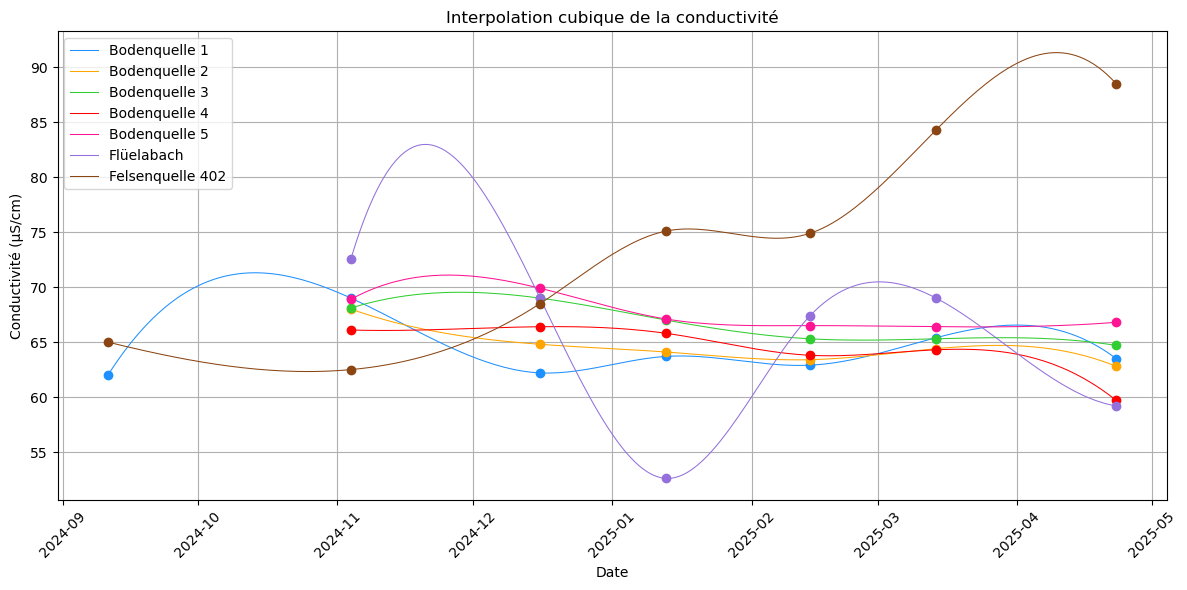

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Dates des mesures
dates_mesures = np.array(['2024-09-11', '2024-11-04', '2024-12-16',
                          '2025-01-13', '2025-02-14', '2025-03-14', '2025-04-23'],
                         dtype='datetime64[D]')
dates_jours = (dates_mesures - dates_mesures[0]).astype(int)

# Dictionnaire des séries de conductivité
series = {
    'Bodenquelle 1': np.array(cond_bq1),
    'Bodenquelle 2': np.array(cond_bq2),
    'Bodenquelle 3': np.array(cond_bq3),
    'Bodenquelle 4': np.array(cond_bq4),
    'Bodenquelle 5': np.array(cond_bq5),
    'Flüelabach':    np.array(cond_fb),
    'Felsenquelle 402': np.array(cond_fq),
}

# Couleur personnalisée pour Bodenquelle 5
custom_colors = {'Bodenquelle 5': 'deeppink',
                 'Flüelabach': 'mediumpurple',
                 'Felsenquelle 402': 'saddlebrown',
                 'Bodenquelle 1': 'dodgerblue',
                 'Bodenquelle 2': 'orange',
                 'Bodenquelle 3': 'limegreen',
                 'Bodenquelle 4': 'r',}

# Tracé
plt.figure(figsize=(12, 6))
for i, (label, y_data) in enumerate(series.items()):
    y_data = np.array(y_data)
    valid_idx = ~np.isnan(y_data)
    x_valid = dates_jours[valid_idx]
    y_valid = y_data[valid_idx]

    # Ne rien tracer si < 4 points valides (interp1d cubic nécessite au moins 4 points)
    if len(x_valid) < 4:
        continue

    # Interpolation cubique
    interp_func = interp1d(x_valid, y_valid, kind='cubic')

    # Interpolation uniquement dans l’intervalle valide
    x_interp = np.arange(x_valid[0], x_valid[-1] + 1)
    y_interp = interp_func(x_interp)
    dates_interp = dates_mesures[0] + x_interp.astype('timedelta64[D]')

    # Couleur à utiliser
    color = custom_colors.get(label, None)

    # Tracé
    plt.plot(dates_interp, y_interp, '-', label=label, lw=0.75, color=color)
    plt.plot(dates_mesures[valid_idx], y_valid, 'o', color=color)

# Finitions
plt.xlabel("Date")
plt.ylabel("Conductivité (μS/cm)")
plt.title("Interpolation cubique de la conductivité")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('interpolation_cond_chyn7.png', dpi=300, bbox_inches='tight')
plt.show()


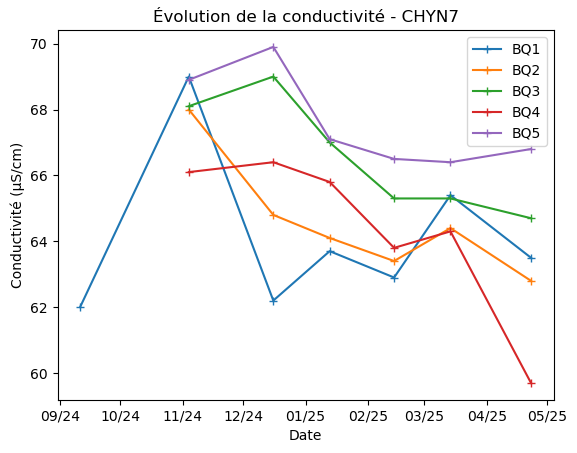

In [156]:
# Tracé
plt.plot(dates_mesures, cond_bq1, marker='+', label='BQ1')
plt.plot(dates_mesures, cond_bq2, marker='+', label='BQ2')
plt.plot(dates_mesures, cond_bq3, marker='+', label='BQ3')
plt.plot(dates_mesures, cond_bq4, marker='+', label='BQ4')
plt.plot(dates_mesures, cond_bq5, marker='+', label='BQ5')

# Formatage de l'axe des dates pour afficher uniquement le jour et le mois
date_format = mdates.DateFormatter('%m/%y')
plt.gca().xaxis.set_major_formatter(date_format)

# Ajout des labels et titre
plt.xlabel("Date")
plt.ylabel("Conductivité (µS/cm)")
plt.title("Évolution de la conductivité - CHYN7")
plt.legend()

# Afficher le graphe
plt.show()

In [19]:
#Données Décembre-Janvier  
#données bodenquellen 
data_271_01 = pd.read_excel("SP_CHYN271_2025-01-13_09_10_09.xlsx")
data_272_01 = pd.read_excel("SP_CHYN272_2025-01-13_09_21_08.xlsx")
data_273_01 = pd.read_excel("SP_CHYN273_2025-01-13_09_32_07.xlsx")
data_274_01 = pd.read_excel("SP_CHYN274_2025-01-13_09_43_47.xlsx")

#données fluelabach
#rivière gelée 

#données felsenquelle hf
data_277_01 = pd.read_excel("SP_CHYN277_2025-01-13_08_38_34.xlsx")

#données BQ1 pression atmmopshérique et température 
data_261_01 = pd.read_excel("SP_CHYN261_2025-01-13_09_02_22.xlsx")

In [20]:
cond_271_01 = data_271_01["Unnamed: 6"][9:].values
mbar_271_01 = data_271_01["Unnamed: 3"][9:].values
T_271_01 = data_271_01["Unnamed: 4"][9:].values
temps_271_01 = data_271_01["2025-01-13 09:10:13.667000.1"][9:].values

cond_272_01 = data_272_01["Unnamed: 6"][9:].values
mbar_272_01 = data_272_01["Unnamed: 3"][9:].values
T_272_01 = data_272_01["Unnamed: 4"][9:].values
temps_272_01 = data_272_01["dates"][9:].values

cond_273_01 = data_273_01["Unnamed: 6"][9:].values
mbar_273_01 = data_273_01["Unnamed: 3"][9:].values
T_273_01 = data_273_01["Unnamed: 4"][9:].values
temps_273_01 = data_273_01["2025-01-13 09:32:12.567000.1"][9:].values

cond_274_01 = data_274_01["Unnamed: 6"][9:].values
mbar_274_01 = data_274_01["Unnamed: 3"][9:].values
T_274_01 = data_274_01["Unnamed: 4"][9:].values
temps_274_01 = data_274_01["2025-01-13 09:43:52.851000.1"][9:].values

# pas de cond276 du Fluelabach 

cond_277_01 = data_277_01["Unnamed: 6"][9:].values
mbar_277_01 = data_277_01["Unnamed: 3"][9:].values
T_277_01 = data_277_01["Unnamed: 4"][9:].values
temps_277_01 = data_277_01["2025-01-13 08:38:43.377000.1"][9:].values

mbar_261_01 = data_261_01["Unnamed: 3"][9:].values
T_261_01 = data_261_01["Unnamed: 4"][9:].values
temps_261_01 = data_261_01["2025-01-13 09:02:26.731000.1"][9:].values

In [21]:
#Données Janvier-Février  
#données bodenquellen 
data_271_02 = pd.read_excel("SP_CHYN271_2025-02-14_09_59_01.xlsx")
data_272_02 = pd.read_excel("SP_CHYN272_2025-02-14_10_13_31.xlsx")
data_273_02 = pd.read_excel("SP_CHYN273_2025-02-14_10_22_53.xlsx")
data_274_02 = pd.read_excel("SP_CHYN274_2025-02-14_10_32_16.xlsx")

#données fluelabach
data_276_02 = pd.read_excel("SP_CHYN276_2025-02-14_10_53_58.xlsx")

#données felsenquelle hf
data_277_02 = pd.read_excel("SP_CHYN277_2025-02-14_09_41_38.xlsx")

#données BQ1 pression atmmopshérique et température 
data_261_02 = pd.read_excel("SP_CHYN261_2025-02-14_10_04_27.xlsx")

In [22]:
cond_271_02 = data_271_02["Unnamed: 6"][9:].values
mbar_271_02 = data_271_02["Unnamed: 3"][9:].values
T_271_02 = data_271_02["Unnamed: 4"][9:].values
temps_271_02 = data_271_02["2025-02-14 09:59:05.170000.1"][9:].values

cond_272_02 = data_272_02["Unnamed: 6"][9:].values
mbar_272_02 = data_272_02["Unnamed: 3"][9:].values
T_272_02 = data_272_02["Unnamed: 4"][9:].values
temps_272_02 = data_272_02["2025-02-14 10:13:35.621000.1"][9:].values

cond_273_02 = data_273_02["Unnamed: 6"][9:].values
mbar_273_02 = data_273_02["Unnamed: 3"][9:].values
T_273_02 = data_273_02["Unnamed: 4"][9:].values
temps_273_02 = data_273_02["2025-02-14 10:22:57.041000.1"][9:].values

cond_274_02 = data_274_02["Unnamed: 6"][9:].values
mbar_274_02 = data_274_02["Unnamed: 3"][9:].values
T_274_02 = data_274_02["Unnamed: 4"][9:].values
temps_274_02 = data_274_02["2025-02-14 10:32:22.731000.1"][9:].values

cond_276_02 = data_276_02["Unnamed: 6"][9:].values
mbar_276_02 = data_276_02["Unnamed: 3"][9:].values
T_276_02 = data_276_02["Unnamed: 4"][9:].values
temps_276_02 = data_276_02["2025-02-14 10:54:03.577000.1"][9:].values

cond_277_02 = data_277_02["Unnamed: 6"][9:].values
mbar_277_02 = data_277_02["Unnamed: 3"][9:].values
T_277_02 = data_277_02["Unnamed: 4"][9:].values
temps_277_02 = data_277_02["2025-02-14 09:41:44.450000.1"][9:].values

mbar_261_02 = data_261_02["Unnamed: 3"][9:].values
T_261_02 = data_261_02["Unnamed: 4"][9:].values
temps_261_02 = data_261_02["2025-02-14 10:04:49.708000.1"][9:].values

In [23]:
#Données Février-Mars
#données bodenquellen 
data_271_03 = pd.read_excel("SP_CHYN271_2025-03-14_09_59_30.xlsx")
data_272_03 = pd.read_excel("SP_CHYN272_2025-03-14_10_10_12.xlsx")
data_273_03 = pd.read_excel("SP_CHYN273_2025-03-14_10_20_32.xlsx")
data_274_03 = pd.read_excel("SP_CHYN274_2025-03-14_10_30_46.xlsx")

#données fluelabach
data_276_03 = pd.read_excel("SP_CHYN276_2025-03-14_10_55_57.xlsx")

#données felsenquelle hf
data_277_03 = pd.read_excel("SP_CHYN277_2025-03-14_09_36_17.xlsx")

#données BQ1 pression atmmopshérique et température 
data_261_03 = pd.read_excel("SP_CHYN261_2025-03-14_09_53_20.xlsx")

In [24]:
cond_271_03 = data_271_03["Unnamed: 6"][9:].values
mbar_271_03 = data_271_03["Unnamed: 3"][9:].values
T_271_03 = data_271_03["Unnamed: 4"][9:].values
temps_271_03 = data_271_03["2025-03-14 09:59:42.584000.1"][9:].values

cond_272_03 = data_272_03["Unnamed: 6"][9:].values
mbar_272_03 = data_272_03["Unnamed: 3"][9:].values
T_272_03 = data_272_03["Unnamed: 4"][9:].values
temps_272_03 = data_272_03["2025-03-14 10:10:16.828000.1"][9:].values

cond_273_03 = data_273_03["Unnamed: 6"][9:].values
mbar_273_03 = data_273_03["Unnamed: 3"][9:].values
T_273_03 = data_273_03["Unnamed: 4"][9:].values
temps_273_03 = data_273_03["2025-03-14 10:20:41.249000.1"][9:].values

cond_274_03 = data_274_03["Unnamed: 6"][9:].values
mbar_274_03 = data_274_03["Unnamed: 3"][9:].values
T_274_03 = data_274_03["Unnamed: 4"][9:].values
temps_274_03 = data_274_03["2025-03-14 10:30:49.686000.1"][9:].values

cond_276_03 = data_276_03["Unnamed: 6"][9:].values
mbar_276_03 = data_276_03["Unnamed: 3"][9:].values
T_276_03 = data_276_03["Unnamed: 4"][9:].values
temps_276_03 = data_276_03["dates"][9:].values

cond_277_03 = data_277_03["Unnamed: 6"][9:].values
mbar_277_03 = data_277_03["Unnamed: 3"][9:].values
T_277_03 = data_277_03["Unnamed: 4"][9:].values
temps_277_03 = data_277_03["2025-03-14 09:36:24.764000.1"][9:].values

mbar_261_03 = data_261_03["Unnamed: 3"][9:].values
T_261_03 = data_261_03["Unnamed: 4"][9:].values
temps_261_03 = data_261_03["2025-03-14 09:53:27.942000.1"][9:].values

In [104]:
#Données Mars-Avril
#données bodenquellen 
data_271_04 = pd.read_excel("SP_CHYN271_2025-04-23_08_02_23.xlsx")
data_272_04 = pd.read_excel("SP_CHYN272_2025-04-23_08_13_38.xlsx")
data_273_04 = pd.read_excel("SP_CHYN273_2025-04-23_08_24_18.xlsx")
data_274_04 = pd.read_excel("SP_CHYN274_2025-04-23_08_36_41.xlsx")

#données fluelabach
data_276_04 = pd.read_excel("SP_CHYN276_2025-04-23_09_16_40.xlsx")

#données felsenquelle hf
data_277_04 = pd.read_excel("SP_CHYN277_2025-04-23_07_40_43.xlsx")

#données BQ1 pression atmmopshérique et température 
data_261_04 = pd.read_excel("SP_CHYN261_2025-04-23_07_55_28.xlsx")

In [105]:
cond_271_04 = data_271_04["Unnamed: 6"][9:].values
mbar_271_04 = data_271_04["Unnamed: 3"][9:].values
T_271_04 = data_271_04["Unnamed: 4"][9:].values
temps_271_04 = data_271_04["2025-04-23 08:02:30.878000.1"][9:].values

cond_272_04 = data_272_04["Unnamed: 6"][9:].values
mbar_272_04 = data_272_04["Unnamed: 3"][9:].values
T_272_04 = data_272_04["Unnamed: 4"][9:].values
temps_272_04 = data_272_04["2025-04-23 08:13:43.980000.1"][9:].values

cond_273_04 = data_273_04["Unnamed: 6"][9:].values
mbar_273_04 = data_273_04["Unnamed: 3"][9:].values
T_273_04 = data_273_04["Unnamed: 4"][9:].values
temps_273_04 = data_273_04["dates"][9:].values

cond_274_04 = data_274_04["Unnamed: 6"][9:].values
mbar_274_04 = data_274_04["Unnamed: 3"][9:].values
T_274_04 = data_274_04["Unnamed: 4"][9:].values
temps_274_04 = data_274_04["2025-04-23 08:36:46.661000.1"][9:].values

cond_276_04 = data_276_04["Unnamed: 6"][9:].values
mbar_276_04 = data_276_04["Unnamed: 3"][9:].values
T_276_04 = data_276_04["Unnamed: 4"][9:].values
temps_276_04 = data_276_04["dates"][9:].values

cond_277_04 = data_277_04["Unnamed: 6"][9:].values
mbar_277_04 = data_277_04["Unnamed: 3"][9:].values
T_277_04 = data_277_04["Unnamed: 4"][9:].values
temps_277_04 = data_277_04["2025-04-23 07:40:49.707000.1"][9:].values

mbar_261_04 = data_261_04["Unnamed: 3"][9:].values
T_261_04 = data_261_04["Unnamed: 4"][9:].values
temps_261_04 = data_261_04["2025-04-23 07:55:38.312000.1"][9:].values

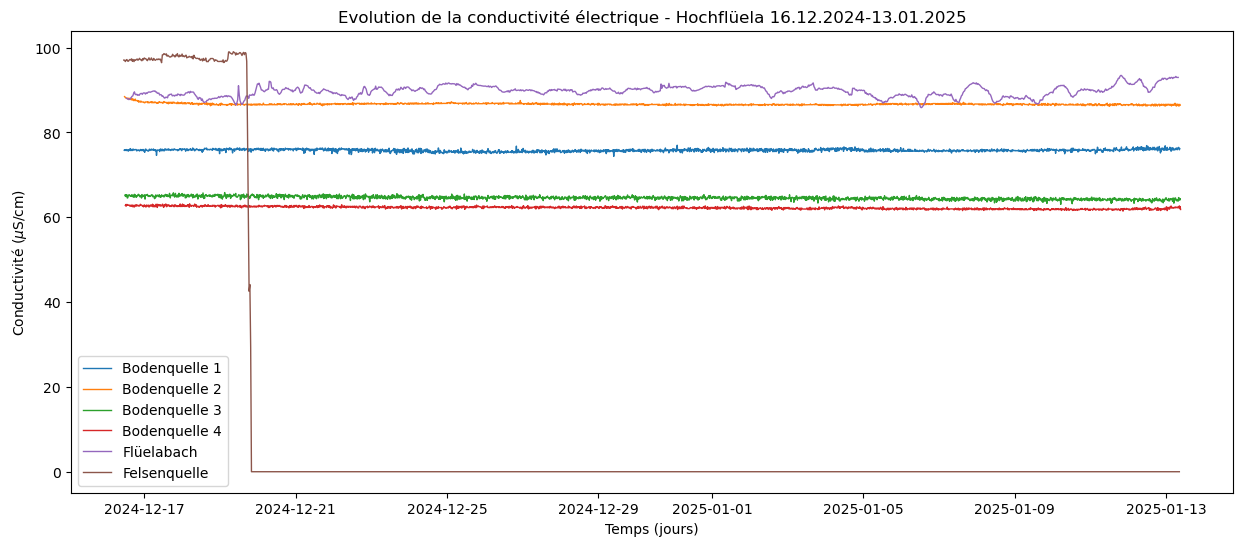

In [25]:
plt.figure(figsize=(15,6))
plt.plot(temps_271_01[:-1], cond_271_01[:-1], lw=1, label='Bodenquelle 1')
plt.plot(temps_272_01[:-1], cond_272_01[:-1], lw=1, label='Bodenquelle 2')
plt.plot(temps_273_01[:-1], cond_273_01[:-1], lw=1, label='Bodenquelle 3')
plt.plot(temps_274_01[:-1], cond_274_01[:-1], lw=1, label='Bodenquelle 4')
plt.plot(temps_276_02[:1335], cond_276_02[:1335], lw=1, label='Flüelabach')
plt.plot(temps_277_01[1:], cond_277_01[1:], lw=1, label='Felsenquelle')
plt.xlabel('Temps (jours)')
plt.ylabel('Conductivité ($\\mu$S/cm)')
plt.legend()
plt.title('Evolution de la conductivité électrique - Hochflüela 16.12.2024-13.01.2025')
plt.show()

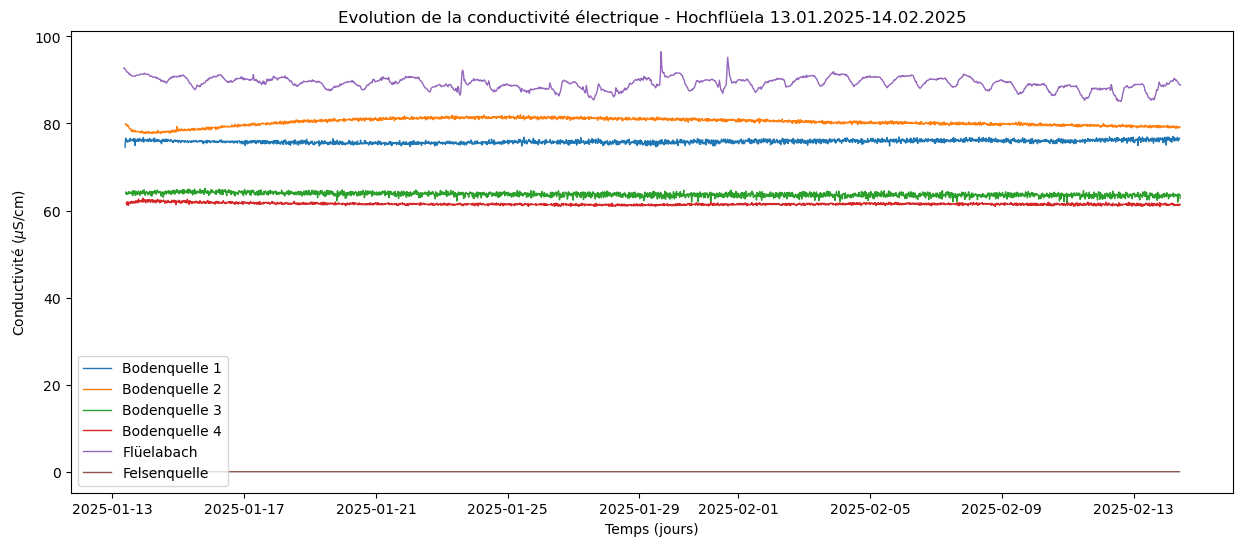

In [26]:
plt.figure(figsize=(15,6))
plt.plot(temps_271_02[:-1], cond_271_02[:-1], lw=1, label='Bodenquelle 1')
plt.plot(temps_272_02[:-1], cond_272_02[:-1], lw=1, label='Bodenquelle 2')
plt.plot(temps_273_02[:-1], cond_273_02[:-1], lw=1, label='Bodenquelle 3')
plt.plot(temps_274_02[:-1], cond_274_02[:-1], lw=1, label='Bodenquelle 4')
plt.plot(temps_276_02[1335:-1], cond_276_02[1335:-1], lw=1, label='Flüelabach')
plt.plot(temps_277_02[1:], cond_277_02[1:], lw=1, label='Felsenquelle')
plt.xlabel('Temps (jours)')
plt.ylabel('Conductivité ($\\mu$S/cm)')
plt.legend()
plt.title('Evolution de la conductivité électrique - Hochflüela 13.01.2025-14.02.2025')
plt.show()

In [135]:
#Mise en commun des jeux de données pour représenter les variations au cours de la période d'observation 

#Bodenquelle 1
tot_temps_271 = np.hstack((temps_271_12[2:], temps_271_01[:-1], temps_271_02[1:-1], temps_271_03, temps_271_04))
tot_cond_271 = np.hstack((cond_271_12[2:], cond_271_01[:-1], cond_271_02[1:-1], cond_271_03, cond_271_04))
tot_T_271 = np.hstack((T_271_12[2:], T_271_01[:-1], T_271_02[1:-1], T_271_03, T_271_04))
tot_mbar_271 = np.hstack((mbar_271_12[2:], mbar_271_01[:-1], mbar_271_02[1:-1], mbar_271_03, mbar_271_04))

#Bodenquelle 1 Pression atmosphérique et température de l'air 
tot_temps_261 = np.hstack((temps_261_12[4:-1], temps_261_01[2:-1], temps_261_02[1:-1], temps_261_03[1:], temps_261_04[4:]))
tot_T_261 = np.hstack((T_261_12[4:-1], T_261_01[2:-1], T_261_02[1:-1], T_261_03[1:], T_261_04[4:]))
tot_mbar_261 = np.hstack((mbar_261_12[4:-1], mbar_261_01[2:-1], mbar_261_02[1:-1], mbar_261_03[1:], mbar_261_04[4:]))

#Bodenquelle 2
tot_temps_272 = np.hstack((temps_272_12[5:], temps_272_01[:-1], temps_272_02[1:], temps_272_03, temps_272_04))
tot_cond_272 = np.hstack((cond_272_12[5:], cond_272_01[:-1], cond_272_02[1:], cond_272_03, cond_272_04))
tot_T_272 = np.hstack((T_272_12[5:], T_272_01[:-1], T_272_02[1:], T_272_03, T_272_04))
tot_mbar_272 = np.hstack((mbar_272_12[5:], mbar_272_01[:-1], mbar_272_02[1:], mbar_272_03, mbar_272_04))

#Bodenquelle 3
tot_temps_273 = np.hstack((temps_273_12[5:], temps_273_01, temps_273_02, temps_273_03, temps_273_04))
tot_cond_273 = np.hstack((cond_273_12[5:], cond_273_01, cond_273_02, cond_273_03, cond_273_04))
tot_T_273 = np.hstack((T_273_12[5:], T_273_01, T_273_02, T_273_03, T_273_04))
tot_mbar_273 = np.hstack((mbar_273_12[5:], mbar_273_01, mbar_273_02, mbar_273_03, mbar_273_04))

#Bodenquelle 4
tot_temps_274 = np.hstack((temps_274_12[6:], temps_274_01, temps_274_02, temps_274_03, temps_274_04[:-1]))
tot_cond_274 = np.hstack((cond_274_12[6:], cond_274_01, cond_274_02, cond_274_03, cond_274_04[:-1]))
tot_T_274 = np.hstack((T_274_12[6:], T_274_01, T_274_02, T_274_03, T_274_04[:-1]))
tot_mbar_274 = np.hstack((mbar_274_12[6:], mbar_274_01, mbar_274_02, mbar_274_03, mbar_274_04[:-1]))

#Flüelabach 
tot_temps_276 = np.hstack((temps_276_12[10:],  temps_276_02[:-1], temps_276_03, temps_276_04[4:]))
tot_cond_276 = np.hstack((cond_276_12[10:],  cond_276_02[:-1], cond_276_03, cond_276_04[4:]))
tot_T_276 = np.hstack((T_276_12[10:],  T_276_02[:-1], T_276_03, T_276_04[4:]))
tot_mbar_276 = np.hstack((mbar_276_12[10:],  mbar_276_02[:-1], mbar_276_03, mbar_276_04[4:]))

#Felsenquelle 402
tot_temps_277 = np.hstack((temps_277_12[13:], temps_277_01[1:], temps_277_02[1:], temps_277_03[2:], temps_277_04))
tot_cond_277 = np.hstack((cond_277_12[13:], cond_277_01[1:], cond_277_02[1:], cond_277_03[2:], cond_277_04))
tot_T_277 = np.hstack((T_277_12[13:], T_277_01[1:], T_277_02[1:], T_277_03[2:], T_277_04))
tot_mbar_277 = np.hstack((mbar_277_12[13:], mbar_277_01[1:], mbar_277_02[1:], mbar_277_03[2:], mbar_277_04))

Décalage optimal : 215835 minutes


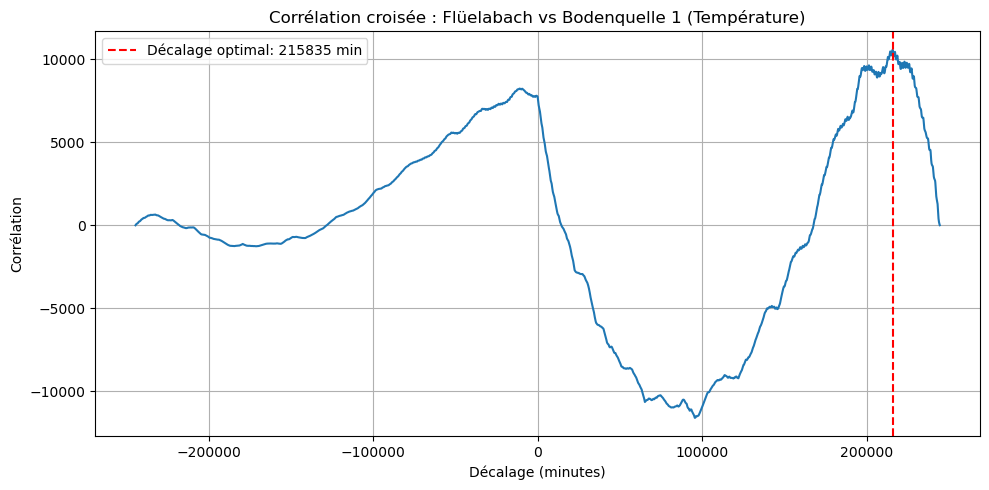

In [136]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.signal import correlate
import matplotlib.pyplot as plt

# Tes vrais vecteurs de datetime et température
t_271 = np.array(tot_temps_271)
T_271 = np.array(tot_T_271)
t_276 = np.array(tot_temps_276)
T_276 = np.array(tot_T_276)

# Trouver l’intervalle commun
t_min = max(t_271[0], t_276[0])
t_max = min(t_271[-1], t_276[-1])

# On choisit un pas commun : ici 15 min
dt_minutes = 15
t_common = pd.date_range(start=t_min, end=t_max, freq=f'{dt_minutes}min')

# Convertir les datetime en secondes pour interpoler
t_271_sec = np.array([(t - t_common[0]).total_seconds() for t in t_271])
t_276_sec = np.array([(t - t_common[0]).total_seconds() for t in t_276])
t_common_sec = np.array([(t - t_common[0]).total_seconds() for t in t_common])

# Interpoler
interp_T_271 = interp1d(t_271_sec, T_271, kind='cubic', fill_value='extrapolate')
interp_T_276 = interp1d(t_276_sec, T_276, kind='cubic', fill_value='extrapolate')

T_271_interp = interp_T_271(t_common_sec)
T_276_interp = interp_T_276(t_common_sec)

# Corrélation croisée
cor = correlate(T_276_interp - np.mean(T_276_interp),
                T_271_interp - np.mean(T_271_interp), mode='full')

lags = np.arange(-len(T_271_interp) + 1, len(T_276_interp))
lags_minutes = lags * dt_minutes

# Trouver le décalage optimal
best_lag_idx = np.argmax(cor)
best_lag_minutes = lags_minutes[best_lag_idx]

print(f"Décalage optimal : {best_lag_minutes} minutes")

# Visualisation
plt.figure(figsize=(10, 5))
plt.plot(lags_minutes, cor)
plt.title("Corrélation croisée : Flüelabach vs Bodenquelle 1 (Température)")
plt.xlabel("Décalage (minutes)")
plt.ylabel("Corrélation")
plt.grid(True)
plt.axvline(best_lag_minutes, color='r', linestyle='--', label=f'Décalage optimal: {best_lag_minutes} min')
plt.legend()
plt.tight_layout()
plt.show()


Décalage optimal : 0 minutes


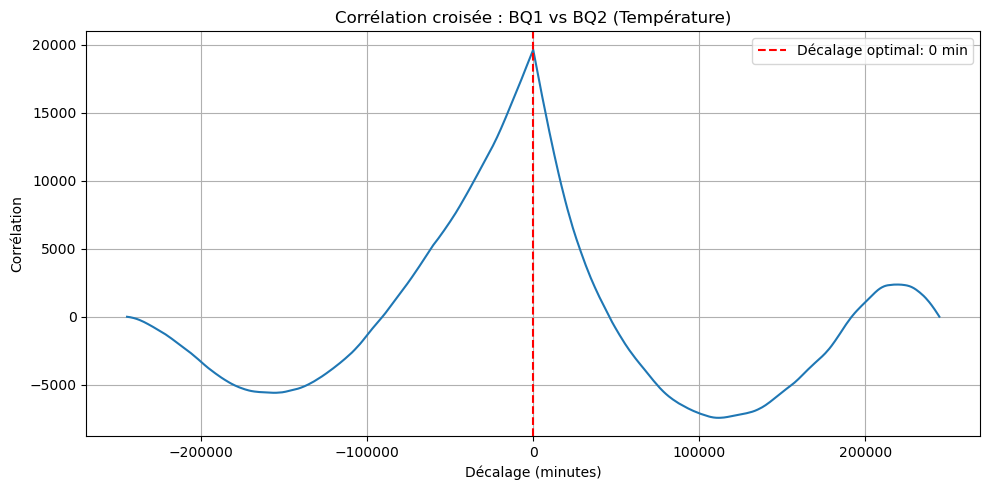

In [137]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.signal import correlate
import matplotlib.pyplot as plt

# Tes vrais vecteurs de datetime et température
t_271 = np.array(tot_temps_271)
T_271 = np.array(tot_T_271)
t_272 = np.array(tot_temps_272)
T_272 = np.array(tot_T_272)

# Trouver l’intervalle commun
t_min = max(t_271[0], t_272[0])
t_max = min(t_271[-1], t_272[-1])

# On choisit un pas commun : ici 15 min
dt_minutes = 15
t_common = pd.date_range(start=t_min, end=t_max, freq=f'{dt_minutes}min')

# Convertir les datetime en secondes pour interpoler
t_271_sec = np.array([(t - t_common[0]).total_seconds() for t in t_271])
t_272_sec = np.array([(t - t_common[0]).total_seconds() for t in t_272])
t_common_sec = np.array([(t - t_common[0]).total_seconds() for t in t_common])

# Interpoler
interp_T_271 = interp1d(t_271_sec, T_271, kind='cubic', fill_value='extrapolate')
interp_T_272 = interp1d(t_272_sec, T_272, kind='cubic', fill_value='extrapolate')

T_271_interp = interp_T_271(t_common_sec)
T_272_interp = interp_T_272(t_common_sec)

# Corrélation croisée
cor = correlate(T_271_interp - np.mean(T_271_interp),
                T_272_interp - np.mean(T_272_interp), mode='full')

lags = np.arange(-len(T_271_interp) + 1, len(T_272_interp))
lags_minutes = lags * dt_minutes

# Trouver le décalage optimal
best_lag_idx = np.argmax(cor)
best_lag_minutes = lags_minutes[best_lag_idx]

print(f"Décalage optimal : {best_lag_minutes} minutes")

# Visualisation
plt.figure(figsize=(10, 5))
plt.plot(lags_minutes, cor)
plt.title("Corrélation croisée : BQ1 vs BQ2 (Température)")
plt.xlabel("Décalage (minutes)")
plt.ylabel("Corrélation")
plt.grid(True)
plt.axvline(best_lag_minutes, color='r', linestyle='--', label=f'Décalage optimal: {best_lag_minutes} min')
plt.legend()
plt.tight_layout()
plt.show()


In [138]:
print(len(t_common_sec))

16311


Décalage optimal (anomalies) : -690 minutes


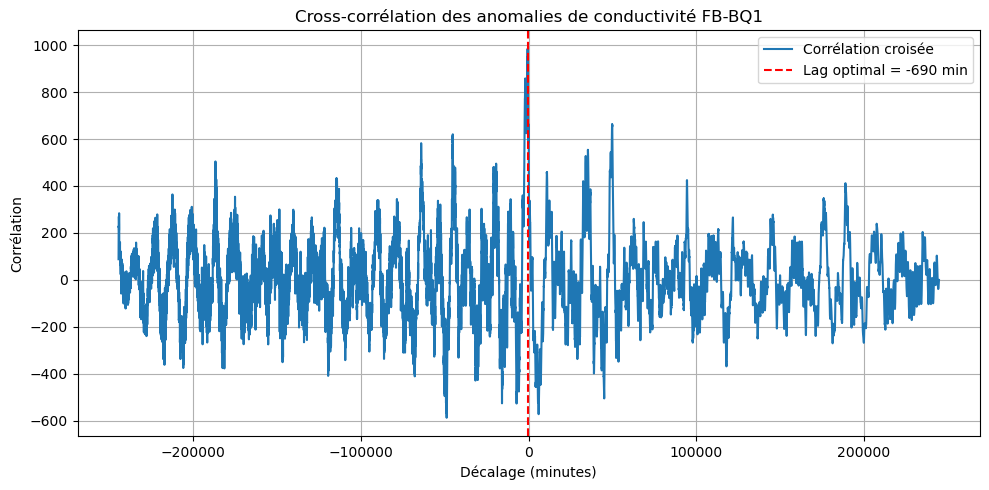

In [149]:


# Trouver l’intervalle commun
t_min_cond = max(tot_temps_271[0], tot_temps_276[0])
t_max_cond = min(tot_temps_271[-1], tot_temps_276[-1])

# On choisit un pas commun : ici 15 min
dt_minutes = 15
t_common = pd.date_range(start=t_min, end=t_max, freq=f'{dt_minutes}min')

# Convertir les datetime en secondes pour interpoler
t_271_sec = np.array([(t - t_common[0]).total_seconds() for t in tot_temps_271])
t_276_sec = np.array([(t - t_common[0]).total_seconds() for t in tot_temps_276])
t_common_sec = np.array([(t - t_common[0]).total_seconds() for t in t_common])

# Interpoler
interp_cond_271 = interp1d(t_271_sec, tot_cond_271, kind='cubic', fill_value='extrapolate')
interp_cond_276 = interp1d(t_276_sec, tot_cond_276, kind='cubic', fill_value='extrapolate')

cond_271_interp = interp_cond_271(t_common_sec)
cond_276_interp = interp_cond_276(t_common_sec)

# 2) Calculer la tendance par moyenne mobile sur ~7 jours (ou autre fenêtre)
# ——————————————————————————————————————————————————
window_days = 7
points_par_window = int((24*60//dt_minutes) * window_days)

series_271 = pd.Series(cond_271_interp, index=t_common)
series_276 = pd.Series(cond_276_interp, index=t_common)

trend_271 = series_271.rolling(window=points_par_window, center=True, min_periods=1).mean()
trend_276 = series_276.rolling(window=points_par_window, center=True, min_periods=1).mean()

anom_271 = series_271 - trend_271
anom_276 = series_276 - trend_276

# Remplacer les NaN éventuels par 0 ou par interpolation si tu préfères
anom_271 = anom_271.fillna(0)
anom_276 = anom_276.fillna(0)


# 3) Cross‑corrélation sur les anomalies
# ——————————————————————————————————————————————————
cor = correlate(anom_276.values - anom_276.values.mean(),
                anom_271.values - anom_271.values.mean(),
                mode='full')

lags = np.arange(-len(anom_271) + 1, len(anom_276))
lags_minutes = lags * dt_minutes

best = lags_minutes[np.argmax(cor)]
print(f"Décalage optimal (anomalies) : {best:.0f} minutes")

# 4) Visualisation
plt.figure(figsize=(10,5))
plt.plot(lags_minutes, cor, label='Corrélation croisée')
plt.axvline(best, color='r', linestyle='--', label=f'Lag optimal = {best:.0f} min')
plt.xlabel("Décalage (minutes)")
plt.ylabel("Corrélation")
plt.title("Cross‑corrélation des anomalies de conductivité FB-BQ1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [140]:
print(tot_temps_277[-1])
print(tot_temps_261[-1])
print(tot_temps_271[-1])
print(tot_temps_272[-1])
print(tot_temps_273[-1])
print(tot_temps_274[-1])
print(tot_temps_276[-1])

2025-04-23 07:15:00
2025-04-23 07:45:00
2025-04-23 07:45:00
2025-04-23 08:00:00
2025-04-23 08:15:00
2025-04-23 08:15:00
2025-04-23 09:00:00


In [141]:
# Créer un dictionnaire pour accéder rapidement aux pressions du 271 par date
dict_271 = {date: pressure for date, pressure in zip(tot_temps_271, tot_mbar_271)}
dict_272 = {date: pressure for date, pressure in zip(tot_temps_272, tot_mbar_272)}
dict_273 = {date: pressure for date, pressure in zip(tot_temps_273, tot_mbar_273)}
dict_274 = {date: pressure for date, pressure in zip(tot_temps_274, tot_mbar_274)}
dict_276 = {date: pressure for date, pressure in zip(tot_temps_276, tot_mbar_276)}
dict_277 = {date: pressure for date, pressure in zip(tot_temps_277, tot_mbar_277)}

tot_mbar2_271 = []
tot_temps_271_filtered = []

tot_mbar2_272 = []
tot_temps_272_filtered = []

tot_mbar2_273 = []
tot_temps_273_filtered = []

tot_mbar2_274 = []
tot_temps_274_filtered = []

tot_mbar2_276 = []
tot_temps_276_filtered = []

tot_mbar2_277 = []
tot_temps_277_filtered = []

# Parcourir les dates de 261 et soustraire si la date existe dans 271
#Bodenquelle 1
for date, pressure_261 in zip(tot_temps_261, tot_mbar_261):
    if date in dict_271:
        tot_mbar2_271.append(dict_271[date] - pressure_261)
        tot_temps_271_filtered.append(date)

#Bodenquelle 2
for date, pressure_261 in zip(tot_temps_261, tot_mbar_261):
    if date in dict_272:
        tot_mbar2_272.append(dict_272[date] - pressure_261)
        tot_temps_272_filtered.append(date)

#Bodenquelle 3
for date, pressure_261 in zip(tot_temps_261, tot_mbar_261):
    if date in dict_273:
        tot_mbar2_273.append(dict_273[date] - pressure_261)
        tot_temps_273_filtered.append(date)

#Bodenquelle 4
for date, pressure_261 in zip(tot_temps_261, tot_mbar_261):
    if date in dict_274:
        tot_mbar2_274.append(dict_274[date] - pressure_261)
        tot_temps_274_filtered.append(date)

#Flüelabach
for date, pressure_261 in zip(tot_temps_261, tot_mbar_261):
    if date in dict_276:
        tot_mbar2_276.append(dict_276[date] - pressure_261)
        tot_temps_276_filtered.append(date)

#Feslenquelle
for date, pressure_261 in zip(tot_temps_261, tot_mbar_261):
    if date in dict_277:
        tot_mbar2_277.append(dict_277[date] - pressure_261)
        tot_temps_277_filtered.append(date)
        
    
   

In [171]:
import numpy as np
import pandas as pd

# Gravité terrestre
g = 9.80665  # m/s²
rho = 1000   # kg/m³

# Fonction pour convertir pression corrigée (en mbar) → hauteur d'eau (en m)
def pression_to_hauteur(pression_mbar):
    pression_pa = np.array(pression_mbar) * 100  # Conversion en Pascal
    hauteur_m = pression_pa / (rho * g)
    return hauteur_m

# Conversion pour chaque sonde
h_271 = pression_to_hauteur(tot_mbar2_271)
h_272 = pression_to_hauteur(tot_mbar2_272)
h_273 = pression_to_hauteur(tot_mbar2_273)
h_274 = pression_to_hauteur(tot_mbar2_274)
h_276 = pression_to_hauteur(tot_mbar2_276)

# Calcul de l'amplitude max - min
amplitude_271 = np.max(h_271) - np.min(h_271)
amplitude_272 = np.max(h_272) - np.min(h_272)
amplitude_273 = np.max(h_273) - np.min(h_273)
amplitude_274 = np.max(h_274) - np.min(h_274)
amplitude_276 = np.max(h_276) - np.min(h_276)

# Regrouper dans un tableau
amplitude_df = pd.DataFrame({
    "ID": ["BQ1", "BQ2", "BQ3", "BQ4", "FB"],
    "Amplitude_m": [amplitude_271, amplitude_272, amplitude_273, amplitude_274, amplitude_276]
})

# Sauvegarder en CSV
amplitude_df.to_csv("variations_hauteur_eau.csv", index=False)

print(amplitude_df)


    ID  Amplitude_m
0  BQ1     0.352270
1  BQ2     0.285830
2  BQ3     0.197607
3  BQ4     0.128834
4   FB     0.230749


[1.80382844 1.80320605 1.80305046 1.80165009 1.80242807]


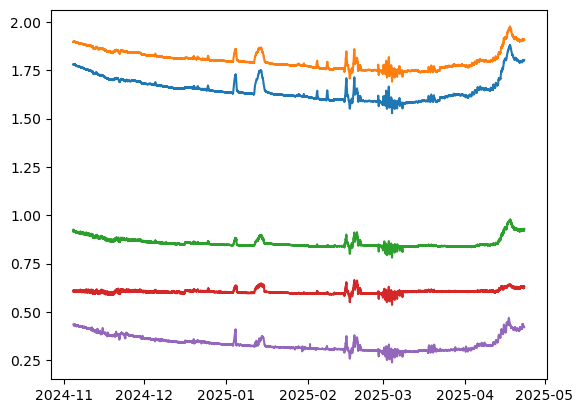

In [174]:
plt.plot(tot_temps_271_filtered, h_271);
plt.plot(tot_temps_272_filtered, h_272);
plt.plot(tot_temps_273_filtered, h_273);
plt.plot(tot_temps_274_filtered, h_274);
plt.plot(tot_temps_276_filtered, h_276);
print(h_271[-5:])

In [142]:
print(len(tot_temps_271))
print(len(tot_temps_271_filtered))

16308
16298


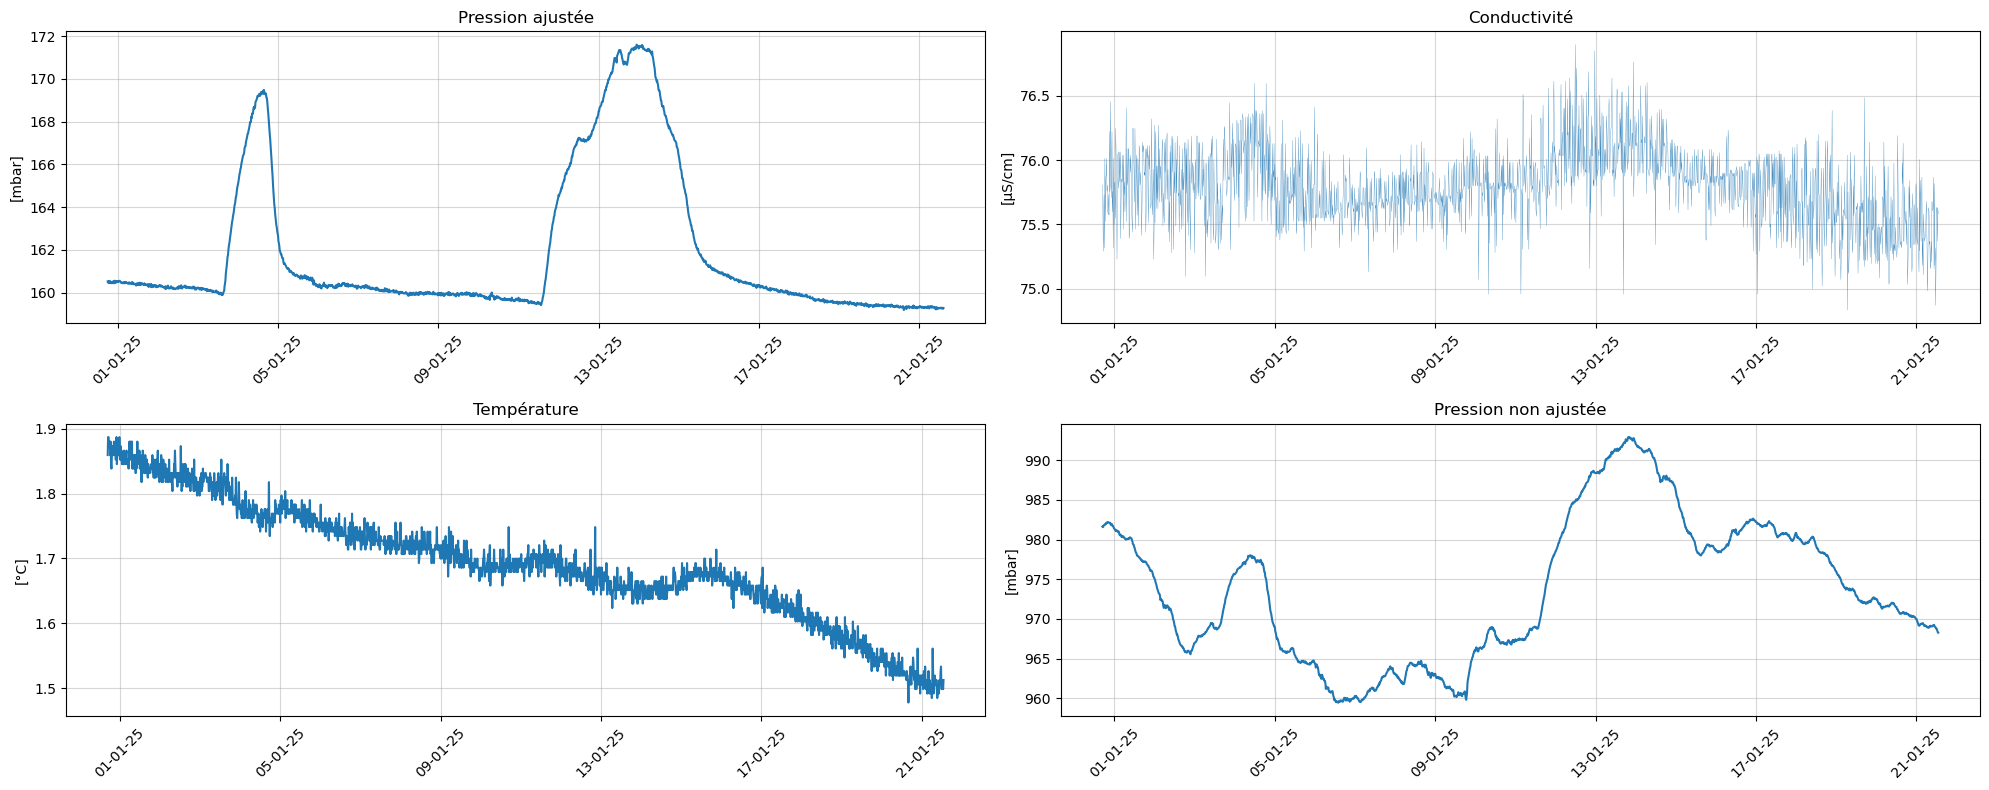

In [143]:
fig, ax = plt.subplots(2, 2, figsize=(20, 8))

ax[0,0].plot(tot_temps_271_filtered[5500:7500], tot_mbar2_271[5500:7500])
ax[0,0].set_title('Pression ajustée')
ax[0,0].set_ylabel('[mbar]')
ax[0,0].grid(alpha=0.5)

ax[0,1].plot(tot_temps_271[5500:7500], tot_cond_271[5500:7500], lw=0.2)
ax[0,1].set_title('Conductivité')
ax[0,1].set_ylabel('[μS/cm]')
ax[0,1].grid(alpha=0.5)

ax[1,0].plot(tot_temps_271[5500:7500], tot_T_271[5500:7500])
ax[1,0].set_title('Température')
ax[1,0].set_ylabel('[°C]')
ax[1,0].grid(alpha=0.5)

ax[1,1].plot(tot_temps_271[5500:7500], tot_mbar_271[5500:7500])
ax[1,1].set_title('Pression non ajustée')
ax[1,1].set_ylabel('[mbar]')
ax[1,1].grid(alpha=0.5)

for ax in ax.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


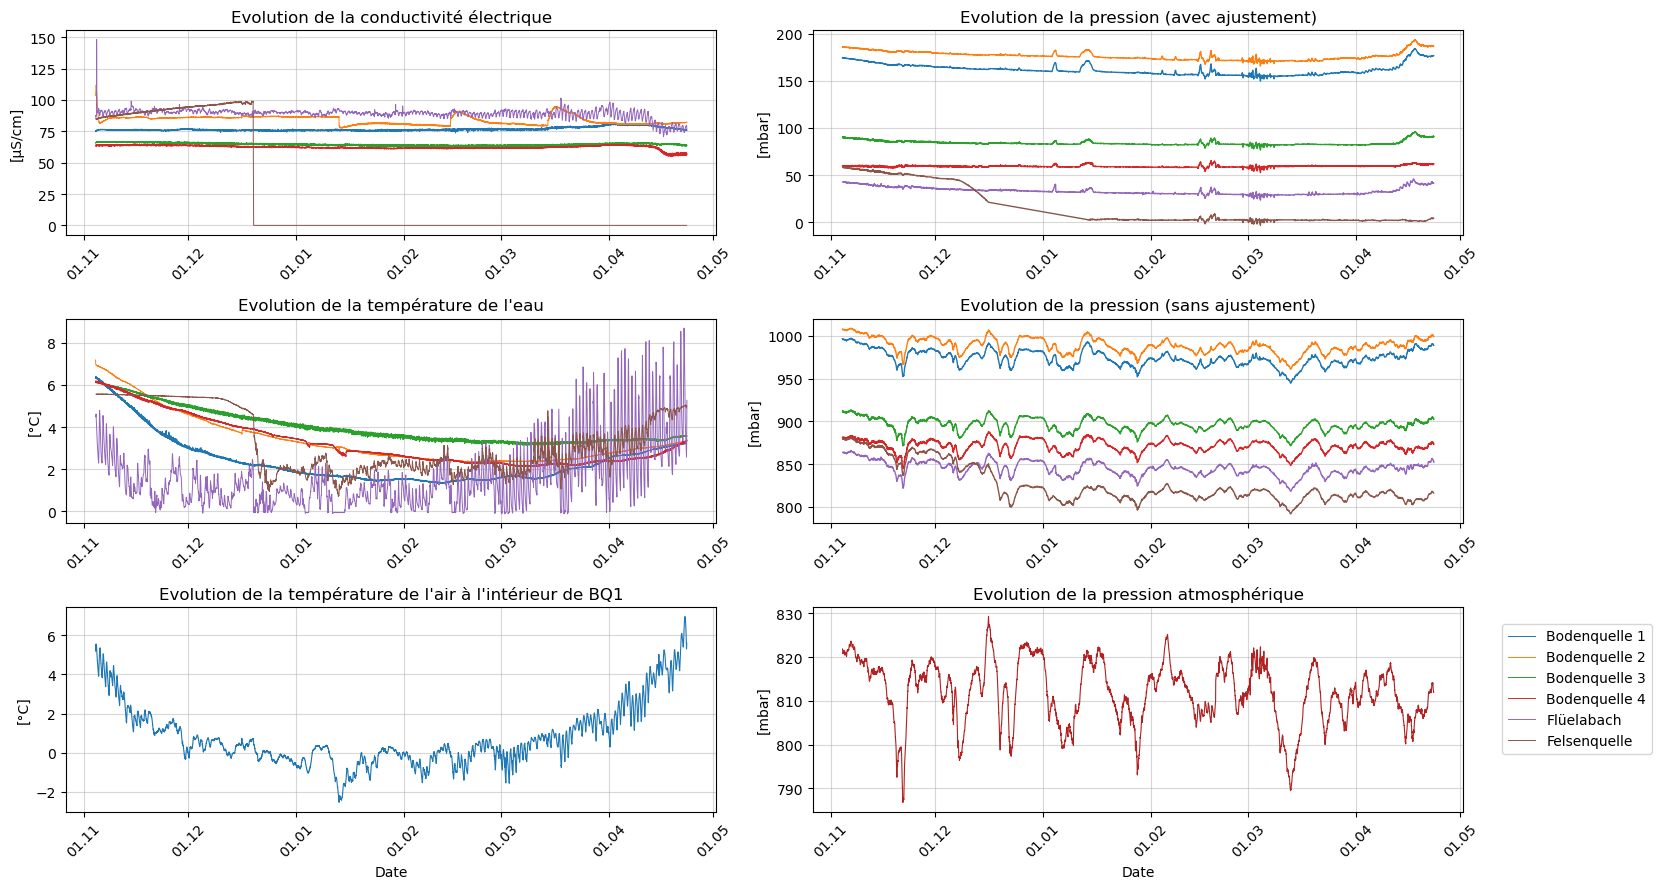

In [144]:
fig, axes = plt.subplots(3, 2, figsize=(15,9), sharex=True)

#Conductivité
axes[0,0].plot(tot_temps_271, tot_cond_271, lw=0.7, label='Bodenquelle 1')
axes[0,0].plot(tot_temps_272, tot_cond_272, lw=0.7, label='Bodenquelle 2')
axes[0,0].plot(tot_temps_273, tot_cond_273, lw=0.7, label='Bodenquelle 3')
axes[0,0].plot(tot_temps_274, tot_cond_274, lw=0.7, label='Bodenquelle 4')
axes[0,0].plot(tot_temps_276, tot_cond_276, lw=0.7, label='Flüelabach')
axes[0,0].plot(tot_temps_277, tot_cond_277, lw=0.7, label='Felsenquelle')
axes[0,0].grid(alpha=0.5)
axes[0,0].set_title("Evolution de la conductivité électrique")
axes[0,0].set_ylabel("[μS/cm]")

#Température 
axes[1,0].plot(tot_temps_271, tot_T_271, lw=0.7, label='Bodenquelle 1')
axes[1,0].plot(tot_temps_272, tot_T_272, lw=0.7, label='Bodenquelle 2')
axes[1,0].plot(tot_temps_273, tot_T_273, lw=0.7, label='Bodenquelle 3')
axes[1,0].plot(tot_temps_274, tot_T_274, lw=0.7, label='Bodenquelle 4')
axes[1,0].plot(tot_temps_276, tot_T_276, lw=0.7, label='Flüelabach')
axes[1,0].plot(tot_temps_277, tot_T_277, lw=0.7, label='Felsenquelle')
axes[1,0].grid(alpha=0.5)
axes[1,0].set_title("Evolution de la température de l'eau")
axes[1,0].set_ylabel("[°C]")

#Pression sans ajustement 
axes[1,1].plot(tot_temps_271, tot_mbar_271, lw=1, label='Bodenquelle 1')
axes[1,1].plot(tot_temps_272, tot_mbar_272, lw=1, label='Bodenquelle 2')
axes[1,1].plot(tot_temps_273, tot_mbar_273, lw=1, label='Bodenquelle 3')
axes[1,1].plot(tot_temps_274, tot_mbar_274, lw=1, label='Bodenquelle 4')
axes[1,1].plot(tot_temps_276, tot_mbar_276, lw=1, label='Flüelabach')
axes[1,1].plot(tot_temps_277, tot_mbar_277, lw=1, label='Felsenquelle')
axes[1,1].set_title("Evolution de la pression (sans ajustement)")
axes[1,1].grid(alpha=0.5)
axes[1,1].set_ylabel("[mbar]")

#Pression avec ajustement 
axes[0,1].plot(tot_temps_271_filtered, tot_mbar2_271, lw=1, label='Bodenquelle 1')
axes[0,1].plot(tot_temps_272_filtered, tot_mbar2_272, lw=1, label='Bodenquelle 2')
axes[0,1].plot(tot_temps_273_filtered, tot_mbar2_273, lw=1, label='Bodenquelle 3')
axes[0,1].plot(tot_temps_274_filtered, tot_mbar2_274, lw=1, label='Bodenquelle 4')
axes[0,1].plot(tot_temps_276_filtered, tot_mbar2_276, lw=1, label='Flüelabach')
axes[0,1].plot(tot_temps_277_filtered, tot_mbar2_277, lw=1, label='Felsenquelle')
axes[0,1].grid(alpha=0.5)
axes[0,1].set_title("Evolution de la pression (avec ajustement)")
axes[0,1].set_ylabel("[mbar]")

#Pression atmosphérique 
axes[2,1].plot(tot_temps_261, tot_mbar_261, lw=0.8, color='firebrick')
axes[2,1].set_title("Evolution de la pression atmosphérique")
axes[2,1].grid(alpha=0.5)
axes[2,1].set_ylabel("[mbar]")
axes[2,1].set_xlabel("Date")

#Température de l'air 
axes[2,0].plot(tot_temps_261, tot_T_261, lw=0.8)
axes[2,0].set_title("Evolution de la température de l'air à l'intérieur de BQ1")
axes[2,0].grid(alpha=0.5)
axes[2,0].set_xlabel("Date")
axes[2,0].set_ylabel("[°C]")

# Récupération des handles et labels depuis le premier axe
handles, labels = axes[0, 0].get_legend_handles_labels()

# Création de la légende globale
fig.legend(
    handles, labels,
    loc='center left',
    bbox_to_anchor=(1, 0.228),
    frameon=True
)


for ax in axes.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
    ax.tick_params(axis='x', rotation=45)
    ax.xaxis.set_tick_params(labelbottom=True)



plt.tight_layout()
plt.savefig('evolution_sondes_11-03.png', dpi=300, bbox_inches='tight')
plt.show()


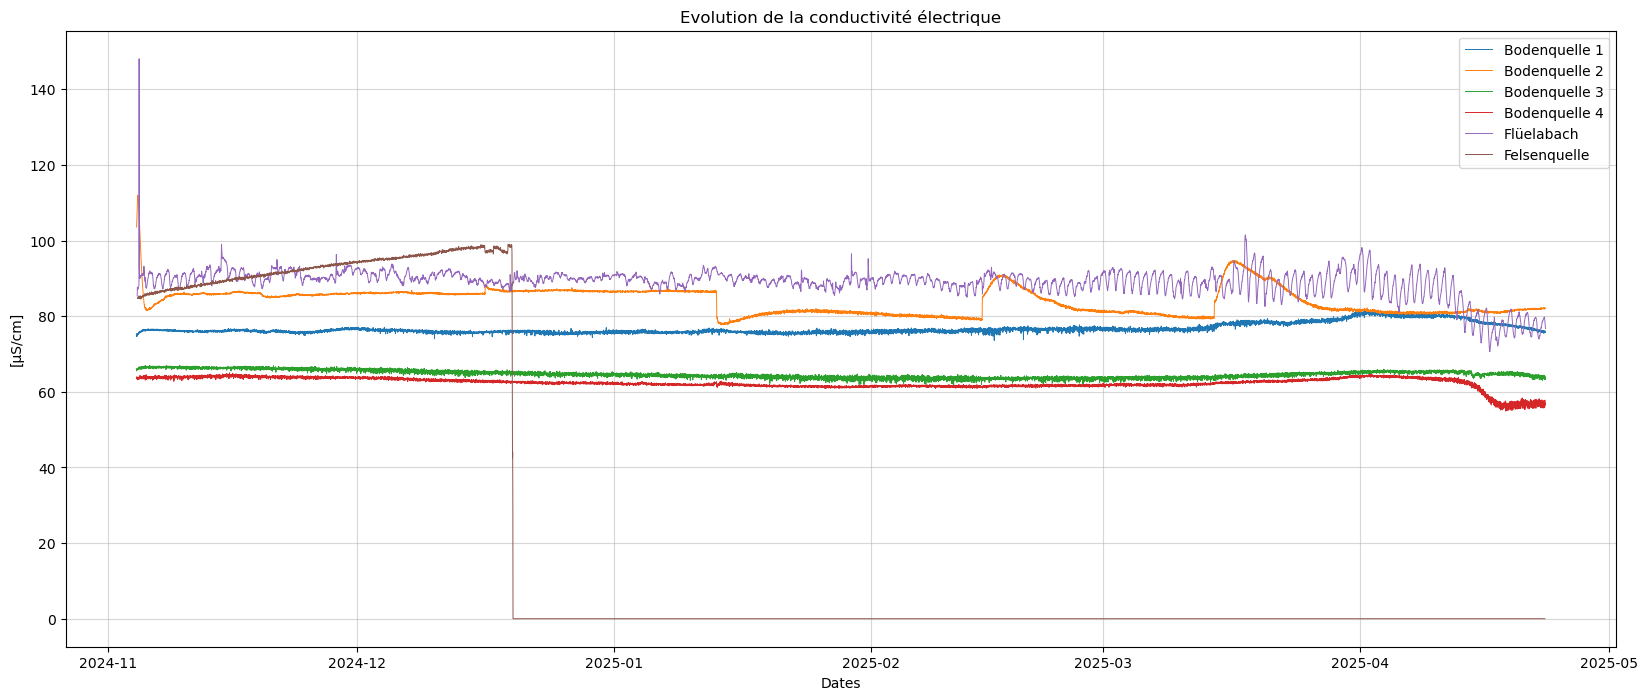

In [170]:
#Conductivité
plt.figure(figsize=(20, 8))
plt.plot(tot_temps_271, tot_cond_271, lw=0.7, label='Bodenquelle 1')
plt.plot(tot_temps_272, tot_cond_272, lw=0.7, label='Bodenquelle 2')
plt.plot(tot_temps_273, tot_cond_273, lw=0.7, label='Bodenquelle 3')
plt.plot(tot_temps_274, tot_cond_274, lw=0.7, label='Bodenquelle 4')
plt.plot(tot_temps_276, tot_cond_276, lw=0.7, label='Flüelabach')
plt.plot(tot_temps_277, tot_cond_277, lw=0.7, label='Felsenquelle')
plt.grid(alpha=0.5)
plt.title("Evolution de la conductivité électrique")
plt.ylabel("[μS/cm]")
plt.xlabel('Dates')
plt.legend()
plt.savefig('evolution_cond_sondesKeller.png', dpi=300, bbox_inches='tight')
plt.show()


In [134]:
print(cond_274_04[-5:])
print(cond_276_04[:10])

[56.93244934082031 56.59198760986328 56.45942687988281 56.89716339111328 0]
[92.864990234375 159.24072265625 109.283447265625 95.91484069824219
 90.8203125 88.14620971679688 87.10861206054688 86.69471740722656
 86.67564392089844 86.74812316894531]


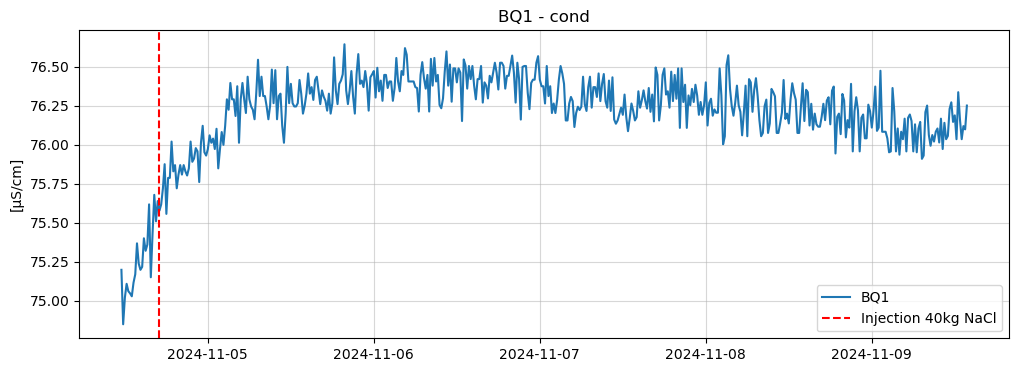

In [95]:
import datetime
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(temps_271_12[10:500], cond_271_12[10:500], label = 'BQ1')

#plt.plot(temps_276_12[10:100], cond_276_12[10:100], lw=0.7, label = 'FB')
plt.axvline(x=datetime.datetime(2024, 11, 4, 17, 0), color='r', linestyle='--', label='Injection 40kg NaCl')
plt.title('BQ1 - cond')
plt.legend()
plt.ylabel('[μS/cm]')
plt.grid(alpha=0.5)
plt.show()

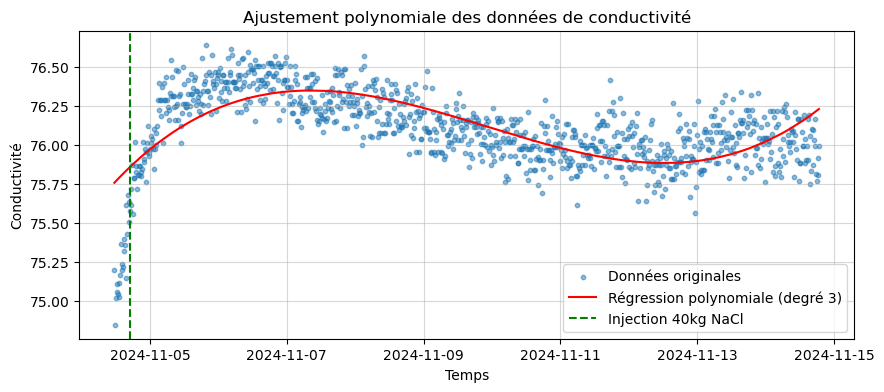

In [35]:
import numpy as np
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Convertir les données en float
timestamps = np.array([t.timestamp() for t in temps_271_12[10:1000]], dtype=np.float64)
conductivity = np.array(cond_271_12[10:1000], dtype=np.float64)

# Définir le degré du polynôme (ajuste-le si nécessaire)
degree = 3
coeffs = np.polyfit(timestamps, conductivity, degree)
poly_eq = np.poly1d(coeffs)  # Fonction polynomiale

# Générer la courbe lissée
inter_x_bq1 = np.linspace(timestamps[0], timestamps[-1], 10000)
inter_y_bq1 = poly_eq(inter_x_bq1)

# Reconversion en datetime pour l'axe x
inter_x_bq1 = [datetime.datetime.fromtimestamp(t) for t in inter_x_bq1]

# Tracé
plt.figure(figsize=(10, 4))
plt.scatter(temps_271_12[10:1000], cond_271_12[10:1000], s=10, label="Données originales", alpha=0.5)
plt.plot(inter_x_bq1, inter_y_bq1, color='r', label=f"Régression polynomiale (degré {degree})", lw=1.5)

# Ajouter la ligne verticale pour l'injection de NaCl
plt.axvline(x=datetime.datetime(2024, 11, 4, 17, 0), color='g', linestyle='--', label='Injection 40kg NaCl')

plt.xlabel("Temps")
plt.ylabel("Conductivité")
plt.title("Ajustement polynomiale des données de conductivité")
plt.legend()
plt.grid(alpha=0.5)
plt.show()



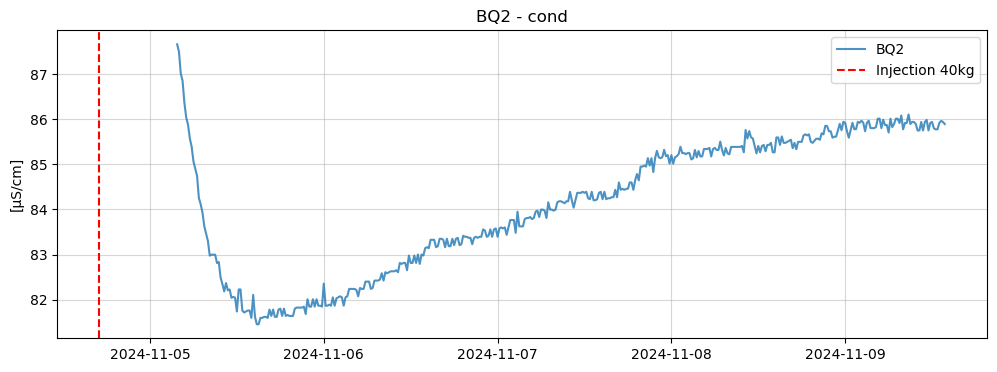

In [94]:
plt.figure(figsize=(12,4))
plt.plot(temps_272_12[75:500], cond_272_12[75:500], alpha=0.8, label = 'BQ2')
plt.axvline(x=datetime.datetime(2024, 11, 4, 17, 0), color='r', linestyle='--', label='Injection 40kg')
plt.title('BQ2 - cond')
plt.legend()
plt.ylabel('[μS/cm]')
plt.grid(alpha=0.5)
plt.show()

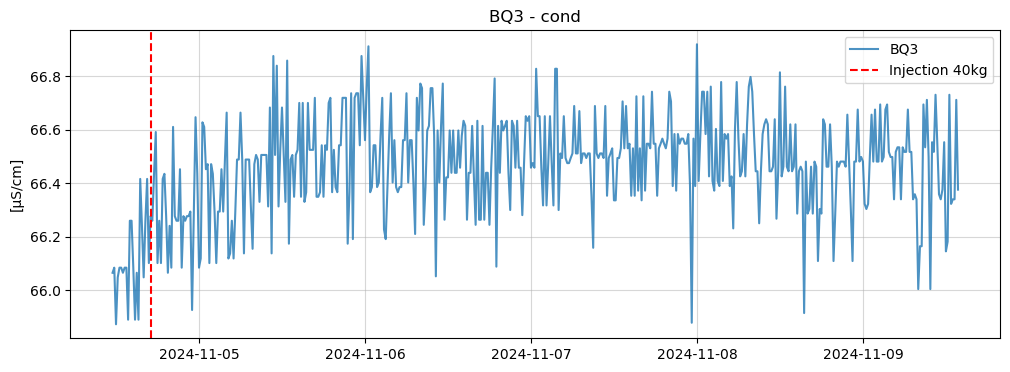

In [93]:
plt.figure(figsize=(12,4))
plt.plot(temps_273_12[10:500], cond_273_12[10:500], alpha=0.8, label = 'BQ3')
plt.axvline(x=datetime.datetime(2024, 11, 4, 17, 0), color='r', linestyle='--', label='Injection 40kg')
plt.title('BQ3 - cond')
plt.legend()
plt.ylabel('[μS/cm]')
plt.grid(alpha=0.5)
plt.show()

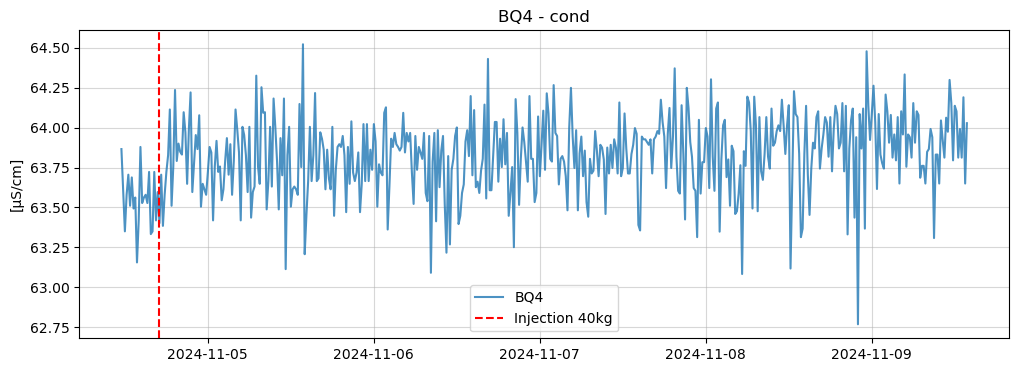

In [97]:
plt.figure(figsize=(12,4))
plt.plot(temps_274_12[10:500], cond_274_12[10:500], alpha=0.8, label = 'BQ4')
plt.axvline(x=datetime.datetime(2024, 11, 4, 17, 0), color='r', linestyle='--', label='Injection 40kg')
plt.title('BQ4 - cond')
plt.legend()
plt.ylabel('[μS/cm]')
plt.grid(alpha=0.5)
plt.show()

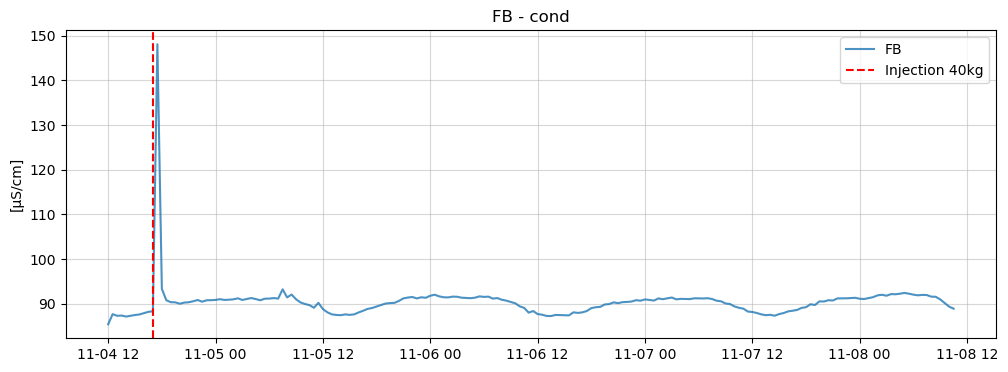

In [101]:
plt.figure(figsize=(12,4))
plt.plot(temps_276_12[10:200], cond_276_12[10:200], alpha=0.8, label = 'FB')
plt.axvline(x=datetime.datetime(2024, 11, 4, 17, 0), color='r', linestyle='--', label='Injection 40kg')
plt.title('FB - cond')
plt.legend()
plt.ylabel('[μS/cm]')
plt.grid(alpha=0.5)
plt.show()

In [37]:
print(' BQ1 : ',T_271_12[:10]) #2
print('\n BQ2 : ',T_272_12[:10]) #4
print('\n BQ3 : ',T_273_12[:10]) #5
print('\n BQ4 : ',T_274_12[:10]) #5
print('\n FB : ',T_276_12[:20]) #10
print('\n FQ : ',T_277_12[:20]) #12

 BQ1 :  [16.0380859375 7.6771240234375 6.3228759765625 6.3089599609375
 6.3367919921875 6.3505859375 6.329833984375 6.3992919921875
 6.3367919921875 6.3714599609375]

 BQ2 :  [14.747314453125 12.187255859375 16.34765625 19.048828125 7.779296875
 7.1815185546875 7.0772705078125 7.03564453125 7.0078125 6.993896484375]

 BQ3 :  [13.0146484375 14.15478515625 15.907470703125 19.31640625 16.4287109375
 6.1357421875 6.1287841796875 6.1287841796875 6.1357421875 6.1427001953125]

 BQ4 :  [13.3798828125 15.884033203125 20.115234375 22.7197265625 19.58642578125
 6.623779296875 6.1097412109375 6.1861572265625 6.1513671875 6.1513671875]

 FB :  [19.24365234375 17.88623046875 16.86279296875 15.909423828125
 12.74365234375 12.08984375 11.783935546875 11.51953125 12.7158203125
 16.15966796875 4.49267578125 4.5830078125 4.5830078125 4.61767578125
 4.5274658203125 4.43017578125 4.381591796875 4.3468017578125
 4.2703857421875 4.138427734375]

 FQ :  [19.1435546875 17.66162109375 16.46484375 15.2199707031

In [38]:
print(' BQ1 : ', T_271_01[-5:] ,T_271_02[:5]) #2
print('\n BQ2 : ', T_272_01[-5:] ,T_272_02[:5]) #4
print('\n BQ3 : ', T_273_01[-5:] ,T_273_02[:5]) #5
print('\n BQ4 : ', T_274_01[-5:] ,T_274_02[:5]) #5
print('\n FB : ', T_276_12[-5:] ,T_276_02[:5]) #10
print('\n FQ : ', T_277_01[-5:] ,T_277_02[:5]) #12

 BQ1 :  [1.67205810546875 1.66510009765625 1.658172607421875 1.637359619140625
 -1.886566162109375] [1.03369140625 1.66510009765625 1.6859130859375 1.66510009765625
 1.651214599609375]

 BQ2 :  [3.054931640625 3.04803466796875 3.04803466796875 3.04803466796875
 -0.3956451416015625] [2.22857666015625 2.8118896484375 2.92303466796875 2.97161865234375
 2.992431640625]

 BQ3 :  [3.86541748046875 3.837646484375 3.85150146484375 3.86541748046875
 3.85150146484375] [3.88623046875 3.8931884765625 3.8931884765625 3.8931884765625
 3.90008544921875]

 BQ4 :  [2.7972412109375 2.80413818359375 2.790283203125 2.80413818359375
 2.82501220703125] [2.8388671875 2.81109619140625 2.76947021484375 2.81109619140625
 2.82501220703125]

 FB :  [1.832794189453125 1.82586669921875 1.7841796875 1.7286376953125
 1.7286376953125] [1.63836669921875 1.6175537109375 1.610595703125 1.610595703125
 1.58978271484375]

 FQ :  [0.7354736328125 0.742401123046875 0.7632293701171875 0.742401123046875
 0.7701568603515625] [0

In [39]:
print(len(tot_temps_271))
print(len(tot_temps_272))
print(len(tot_temps_273))
print(len(tot_temps_274))
print(len(tot_temps_276))
print(len(tot_temps_277))
print(len(tot_temps_261))

12477
12476
12479
12477
6237
6229
12471


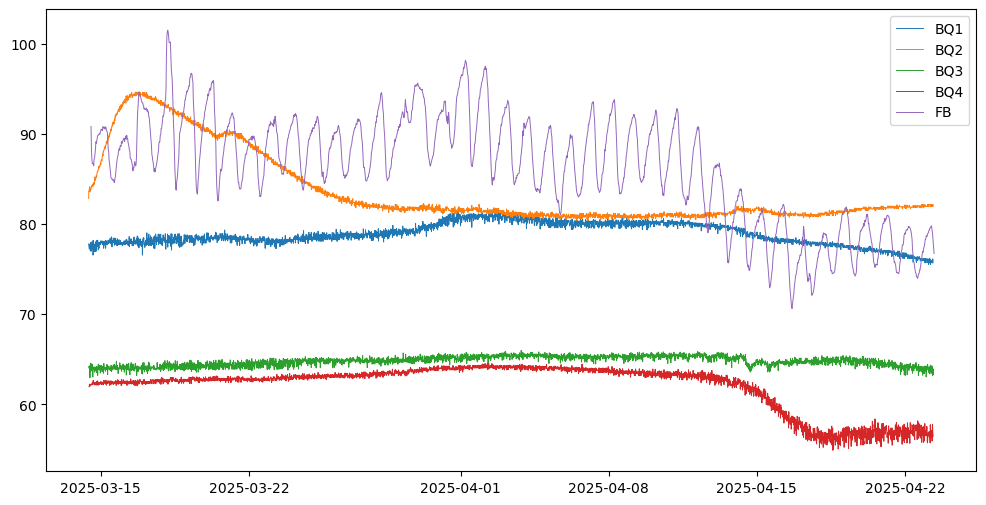

In [183]:
plt.figure(figsize=(12,6))
plt.plot(temps_271_04, cond_271_04, label='BQ1', lw=0.7)
plt.plot(temps_272_04, cond_272_04, label='BQ2', lw=0.7)
plt.plot(temps_273_04, cond_273_04, label='BQ3', lw=0.7)
plt.plot(temps_274_04[:-2], cond_274_04[:-2], label='BQ4', lw=0.7)
plt.plot(temps_276_04[4:], cond_276_04[4:], label='FB', lw=0.7)
#plt.plot(temps_277_04, cond_277_04, label='FQ402')
plt.legend()
plt.show()

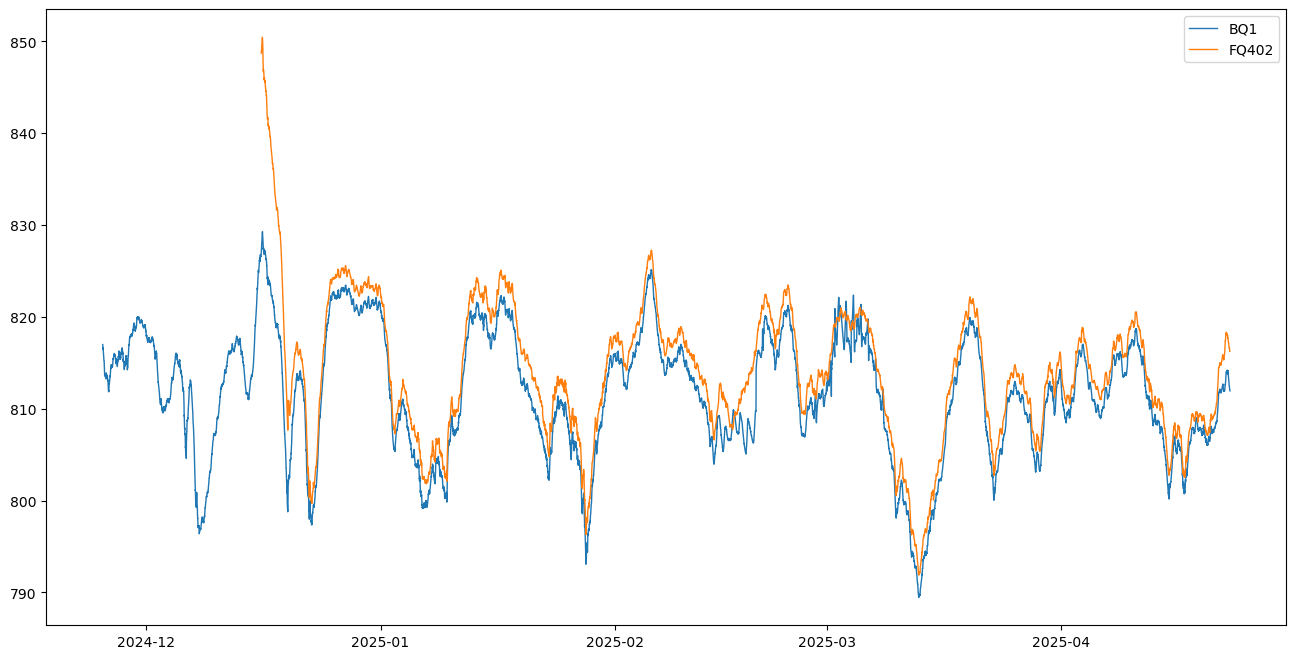

In [198]:
plt.figure(figsize=(16,8))
plt.plot(tot_temps_261[2000:], tot_mbar_261[2000:], lw=1, label='BQ1')
plt.plot(tot_temps_277[2000:], tot_mbar_277[2000:], lw=1, label='FQ402')
plt.legend()
plt.show()

In [201]:
np.savetxt("tot_mbar_261.csv", tot_mbar_261, delimiter=",")
